## 회귀 (regression) 예측 (보스턴 집값 예측)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


수치형 값을 예측 (Y의 값이 연속된 수치로 표현)

**예시**
- 주택 가격 예측
- 매출액 예측

[도큐먼트](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)

In [ ]:
import pandas as pd
import numpy as np

np.set_printoptions(suppress=True)

데이터 로드

In [ ]:
csvFile = "/content/drive/MyDrive/새싹강동3기구글AI과정/code/DataScience/6_scikit-learn/data/Boston_house.csv"
df = pd.read_csv(csvFile)

data['data']에는 X 데이터, data['feature_names']에는 컬럼 명입니다.

Y 데이터인 price도 데이터프레임에 추가 합니다.

In [ ]:
df.head()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,MEDV
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2


**컬럼 소개**

속성 수 : 13

* **CRIM**: 범죄율
* **ZN**: 25,000 평방 피트 당 주거용 토지의 비율
* **INDUS**: 비소매(non-retail) 비즈니스 면적 비율
* **CHAS**: 찰스 강 더미 변수 (통로가 하천을 향하면 1; 그렇지 않으면 0)
* **NOX**: 산화 질소 농도 (천만 분의 1)
* **RM**:주거 당 평균 객실 수
* **AGE**: 1940 년 이전에 건축된 자가 소유 점유 비율
* **DIS**: 5 개의 보스턴 고용 센터까지의 가중 거리     
* **RAD**: 고속도로 접근성 지수
* **TAX**: 10,000 달러 당 전체 가치 재산 세율
* **PTRATIO**  도시 별 학생-교사 비율
* **B**: 1000 (Bk-0.63) ^ 2 여기서 Bk는 도시 별 검정 비율입니다.
* **LSTAT**: 인구의 낮은 지위
* **MEDV**: 자가 주택의 중앙값 (1,000 달러 단위)

train / test 데이터를 분할 합니다.

In [ ]:
df.head()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,MEDV
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('MEDV', axis=1), df['MEDV'], random_state=123)

# MEDV 이전 열 (AGE ~ CHAS)까지 x_train, x_test
# y_train, y_test : MEDV

In [ ]:
x_train.shape, x_test.shape

((379, 13), (127, 13))

In [ ]:
x_train.head()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS
335,34.5,396.90,6.037,0.03961,5.9853,5.19,8.01,0.515,20.2,5,0.0,224,0
142,100.0,396.90,5.403,3.32105,1.3216,19.58,26.82,0.871,14.7,5,0.0,403,1
170,94.6,292.29,5.875,1.20742,2.4259,19.58,14.43,0.605,14.7,5,0.0,403,0
241,65.1,394.62,6.095,0.10612,6.3361,4.93,12.40,0.428,16.6,6,30.0,300,0
379,100.0,393.74,6.223,17.86670,1.3861,18.10,21.78,0.671,20.2,24,0.0,666,0


In [ ]:
y_train.head()

,MEDV
335,21.1
142,13.4
170,17.4
241,20.1
379,10.2


## 평가 지표 만들기

### MSE(Mean Squared Error)

${(\frac{1}{n})\sum_{i=1}^{n}(y_{i} - x_{i})^{2}}$

예측값과 실제값의 차이에 대한 **제곱**에 대하여 평균을 낸 값

### MAE (Mean Absolute Error)

$(\frac{1}{n})\sum_{i=1}^{n}\left | y_{i} - x_{i} \right |$

예측값과 실제값의 차이에 대한 **절대값**에 대하여 평균을 낸 값

### RMSE (Root Mean Squared Error)

$\sqrt{(\frac{1}{n})\sum_{i=1}^{n}(y_{i} - x_{i})^{2}}$


예측값과 실제값의 차이에 대한 **제곱**에 대하여 평균을 낸 뒤 **루트**를 씌운 값

### 평가 지표 만들어 보기

In [ ]:
import numpy as np

In [ ]:
pred = np.array([3, 4, 5])
actual = np.array([1, 2, 3])

In [ ]:
def my_mse(pred, actual):
    return ((pred - actual)**2).mean()

In [ ]:
my_mse(pred, actual)

4.0

In [ ]:
def my_mae(pred, actual):
    return np.abs(pred - actual).mean()

In [ ]:
my_mae(pred, actual)

2.0

In [ ]:
def my_rmse(pred, actual):
    return np.sqrt(my_mse(pred, actual))

In [ ]:
my_rmse(pred, actual)

2.0

### sklearn의 평가지표 활용하기

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
my_mae(pred, actual), mean_absolute_error(pred, actual)

(2.0, 2.0)

In [ ]:
my_mse(pred, actual), mean_squared_error(pred, actual)

(4.0, 4.0)

### 모델별 성능 확인을 위한 함수

In [ ]:
# 이 셀의 코드는 제일 나중에 분석하자.
# 지금은 이게 중요한게 아니다.

import matplotlib.pyplot as plt
import seaborn as sns

my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive',
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray',
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(12, 9))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def mse_eval(name_, pred, actual):
    global predictions
    global colors

    plot_predictions(name_, pred, actual)

    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)

    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10

    length = len(df)

    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['mse'])

    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')

    plt.title('MSE Error', fontsize=18)
    plt.xlim(min_, max_)

    plt.show()

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

## LinearRegression

[도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# n_jobs=-1이면 사용할 수 있는 CPU 다 활용
model = LinearRegression(n_jobs=-1)

* n_jobs: CPU코어의 사용

In [ ]:
model.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [ ]:
pred = model.predict(x_test)

### Multi-variable Linear Regression and Matrix dimension
 **Hypothesis(가설)**   
 h(theta) = regression line to predict future values
 <br> theta = parameters </br>
 <br> </br>
<br> $$\mathbf{ h_\theta(x_{i}) = \theta_0+\theta_1 CRIM + \theta_2 ZN + \theta_3 INDUS + \theta_4 CHAS + \theta_5 NOX + \theta_6 RM + ... }$$ </br>

In [ ]:
# theta_0 => intercept_
# theta_1, theta_2 ... theta_n => coef_

print(model.coef_)
print(model.intercept_)

[ -0.00046914   0.00662261   4.35215724  -0.09789104  -1.37720645
   0.05914935  -0.54855105 -15.49025582  -0.9400115    0.28208575
   0.04277893  -0.01249194   1.23149832]
32.47966480453243


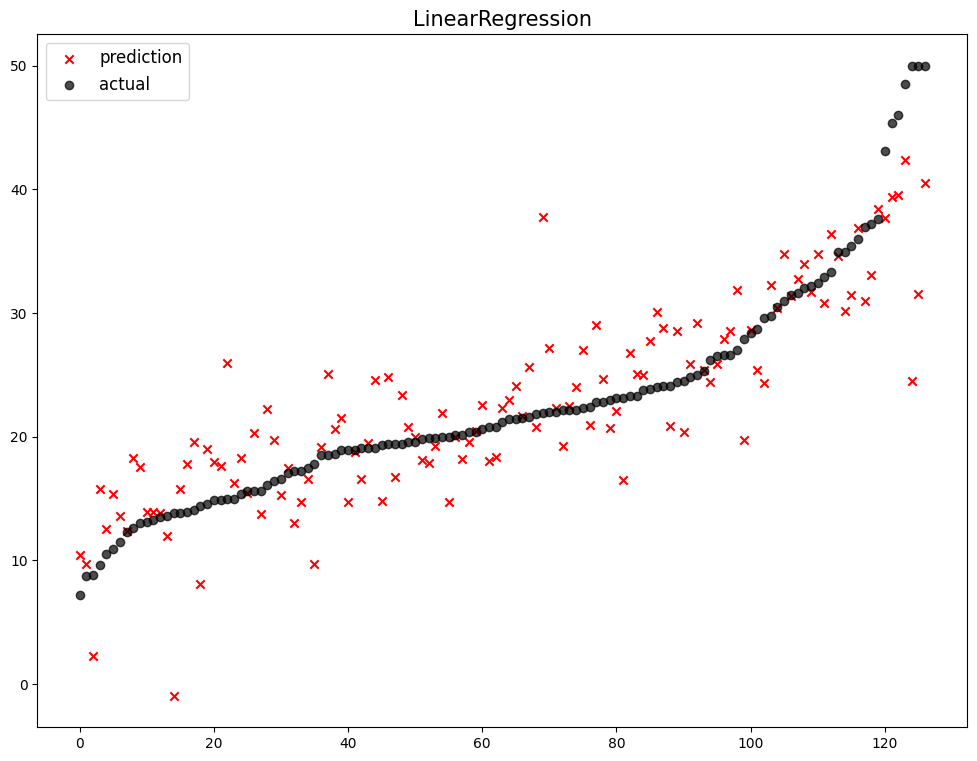

              model        mse
0  LinearRegression  24.768531


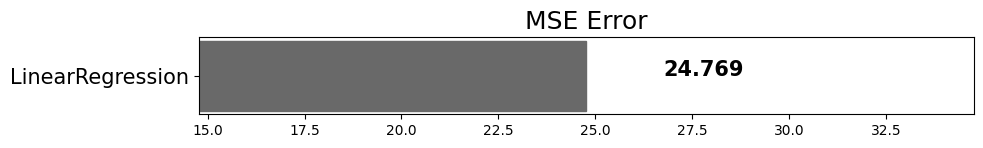

In [ ]:
mse_eval('LinearRegression', pred, y_test)

## 규제 (Regularization)

학습이 과대적합 되는 것을 방지하고자 일종의 **penalty**를 부여하는 것

**L2 규제 (L2 Regularization)**

* 각 가중치 제곱의 합에 규제 강도(Regularization Strength) λ를 곱한다.
* λ를 크게 하면 가중치가 더 많이 감소되고(규제를 중요시함), λ를 작게 하면 가중치가 증가한다(규제를 중요시하지 않음).

**L1 규제 (L1 Regularization)**

* 가중치의 제곱의 합이 아닌 **가중치의 합**을 더한 값에 규제 강도(Regularization Strength) λ를 곱하여 오차에 더한다.
* 어떤 가중치(w)는 실제로 0이 된다. 즉, 모델에서 완전히 제외되는 특성이 생기는 것이다.


**L2 규제가 L1 규제에 비해 더 안정적이라 일반적으로는 L2규제가 더 많이 사용된다**

**릿지(Ridge) - L2 규제**

$Error=MSE+αw^2$

**라쏘(Lasso) - L1 규제**  

$Error=MSE+α|w|$

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
# 값이 커질 수록 큰 규제입니다.
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

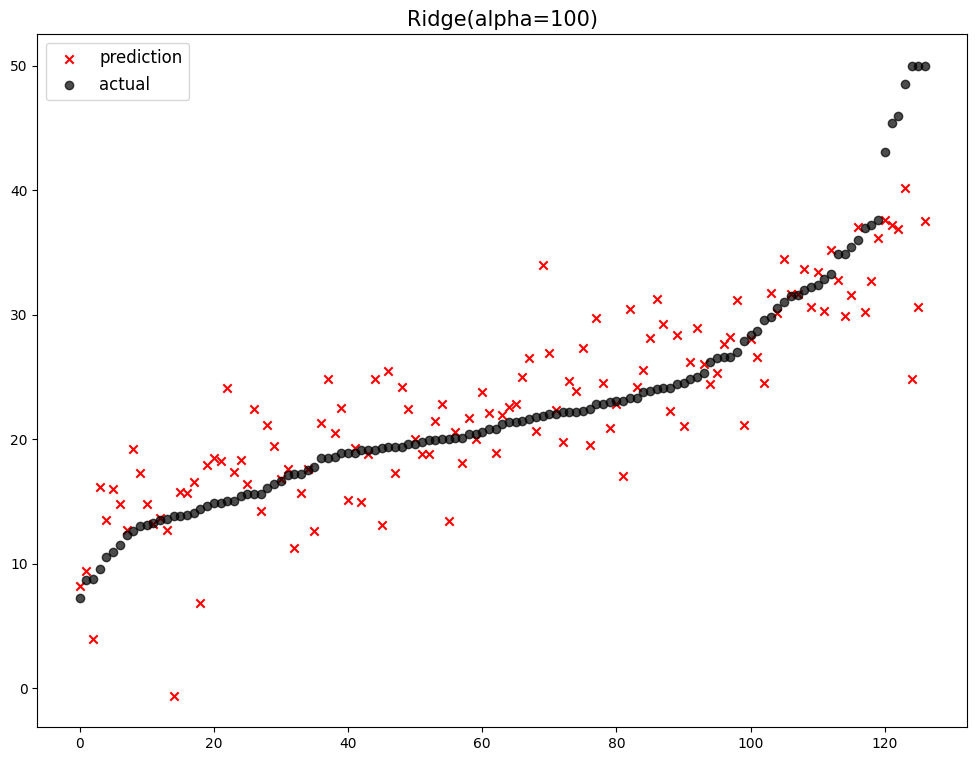

              model        mse
0  Ridge(alpha=100)  25.740489
1  LinearRegression  24.768531


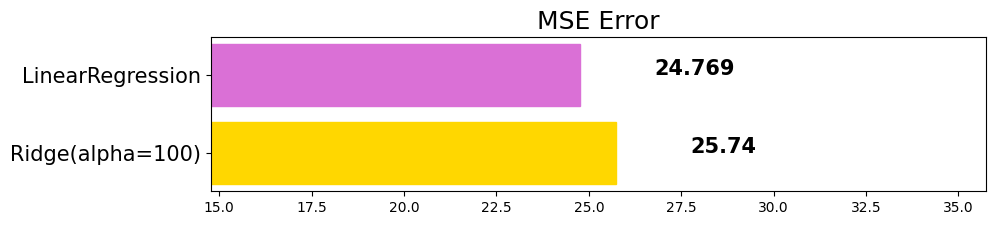

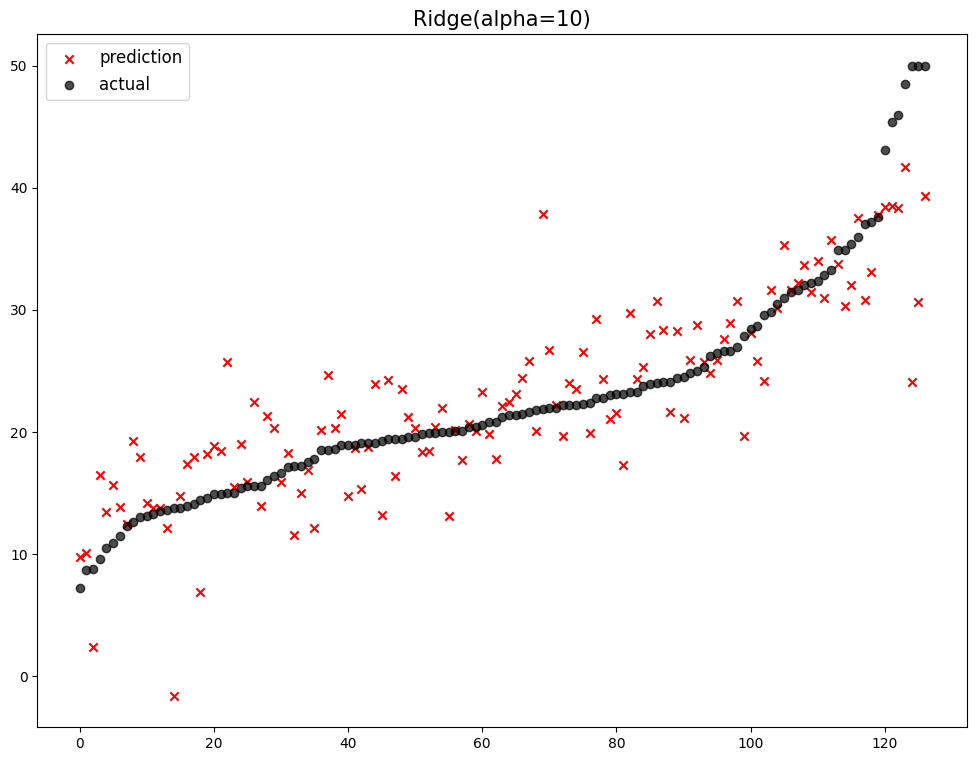

              model        mse
0   Ridge(alpha=10)  26.218671
1  Ridge(alpha=100)  25.740489
2  LinearRegression  24.768531


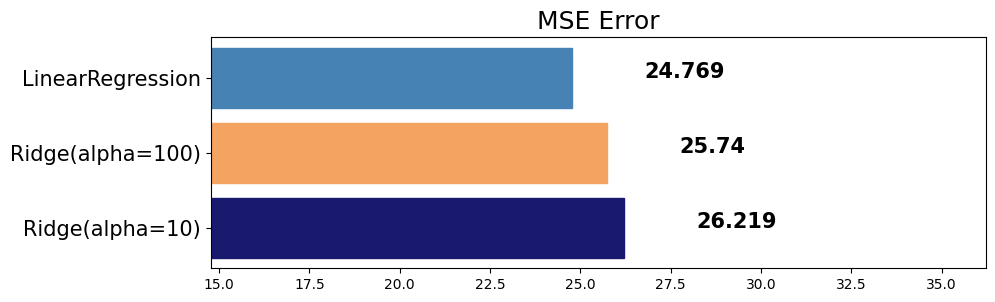

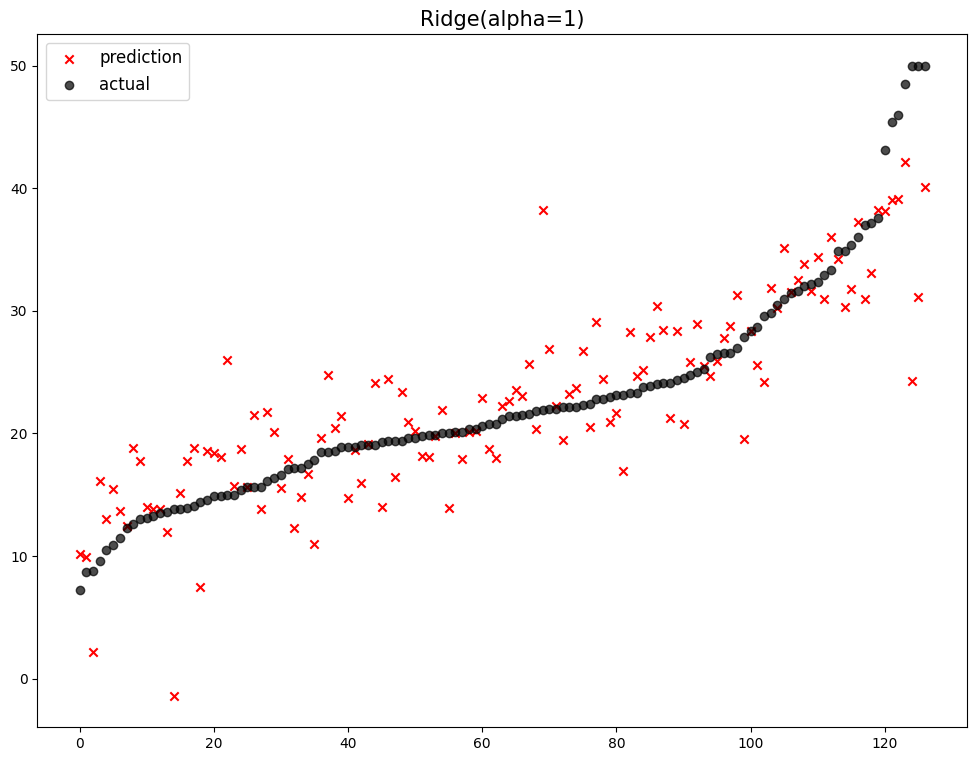

              model        mse
0   Ridge(alpha=10)  26.218671
1  Ridge(alpha=100)  25.740489
2    Ridge(alpha=1)  25.451526
3  LinearRegression  24.768531


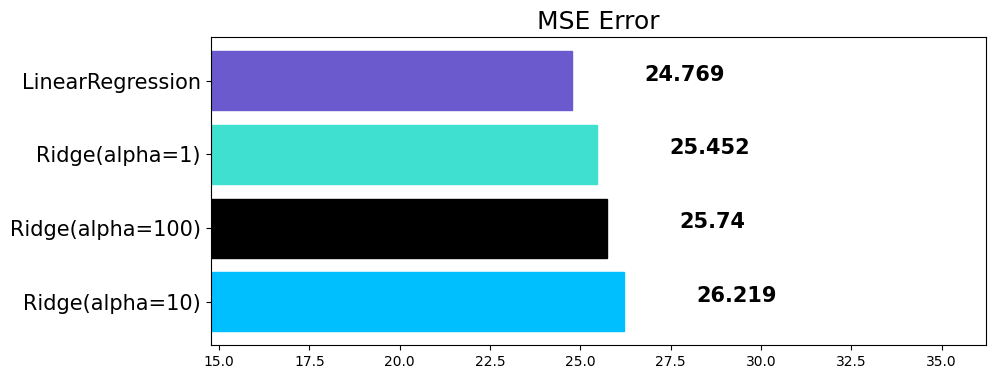

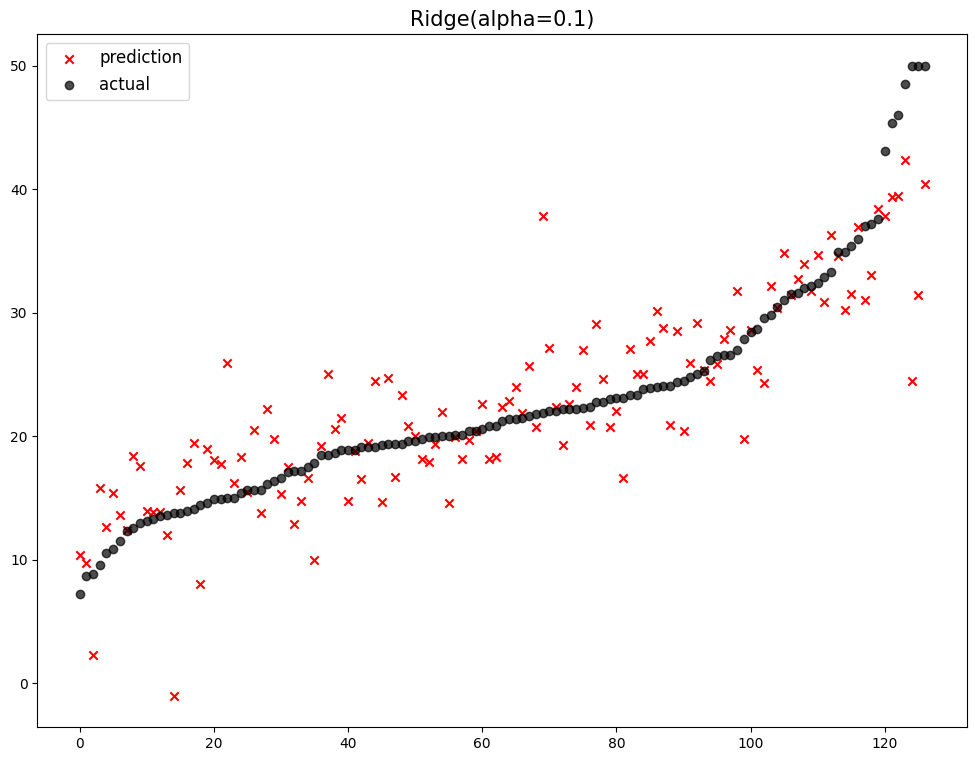

              model        mse
0   Ridge(alpha=10)  26.218671
1  Ridge(alpha=100)  25.740489
2    Ridge(alpha=1)  25.451526
3  Ridge(alpha=0.1)  24.863174
4  LinearRegression  24.768531


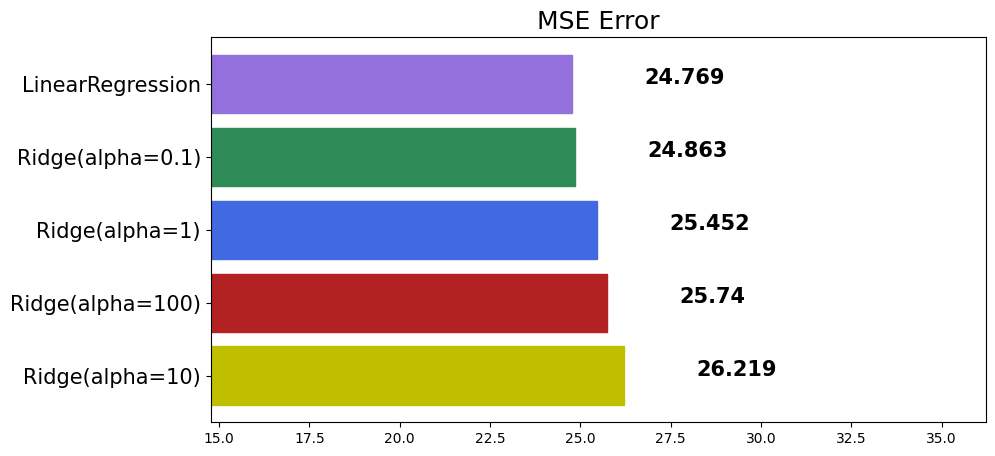

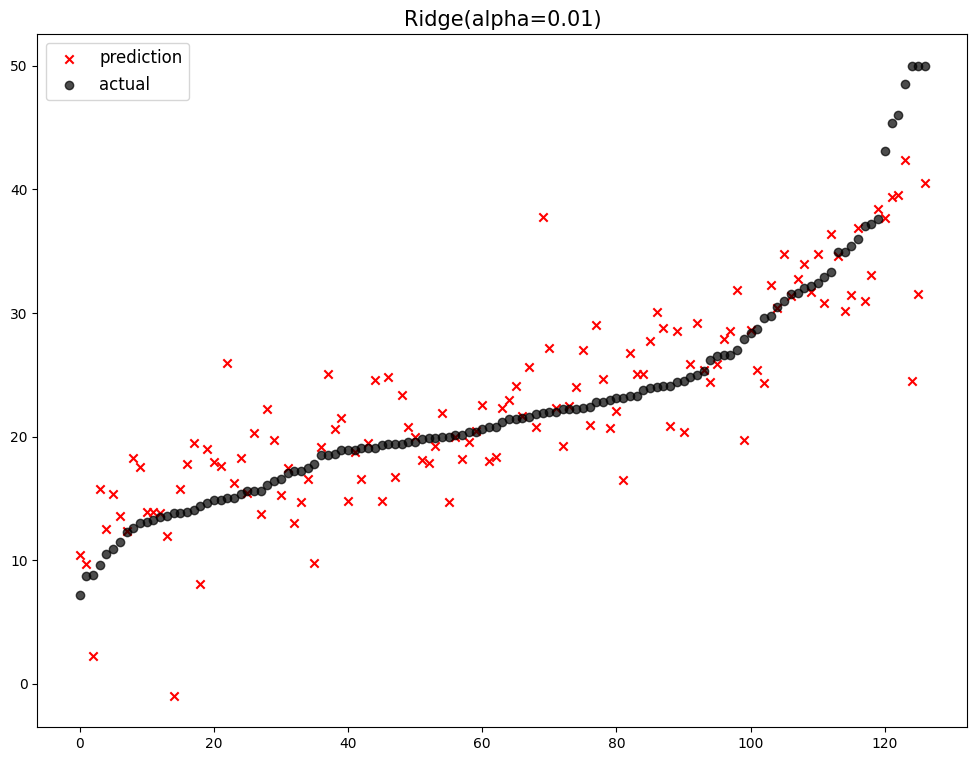

               model        mse
0    Ridge(alpha=10)  26.218671
1   Ridge(alpha=100)  25.740489
2     Ridge(alpha=1)  25.451526
3   Ridge(alpha=0.1)  24.863174
4  Ridge(alpha=0.01)  24.778254
5   LinearRegression  24.768531


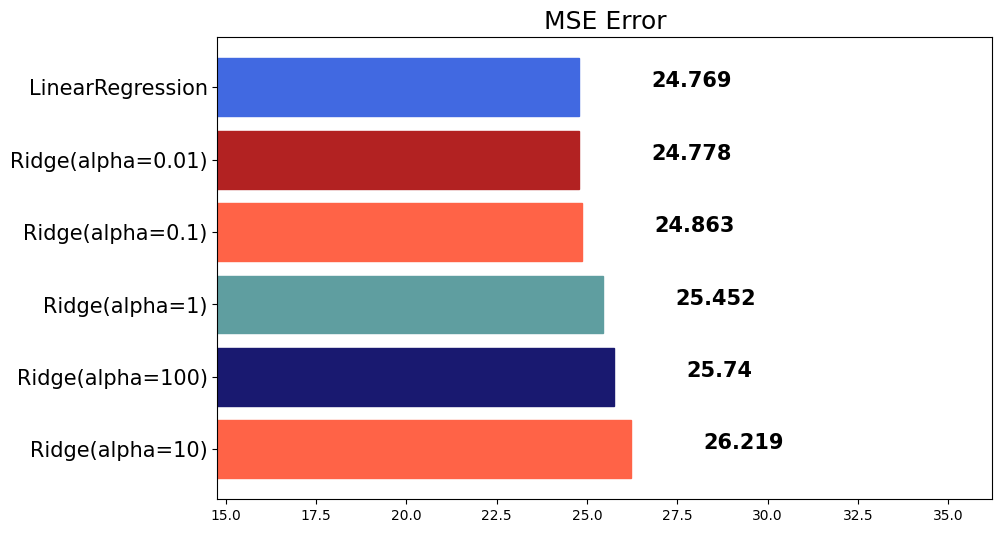

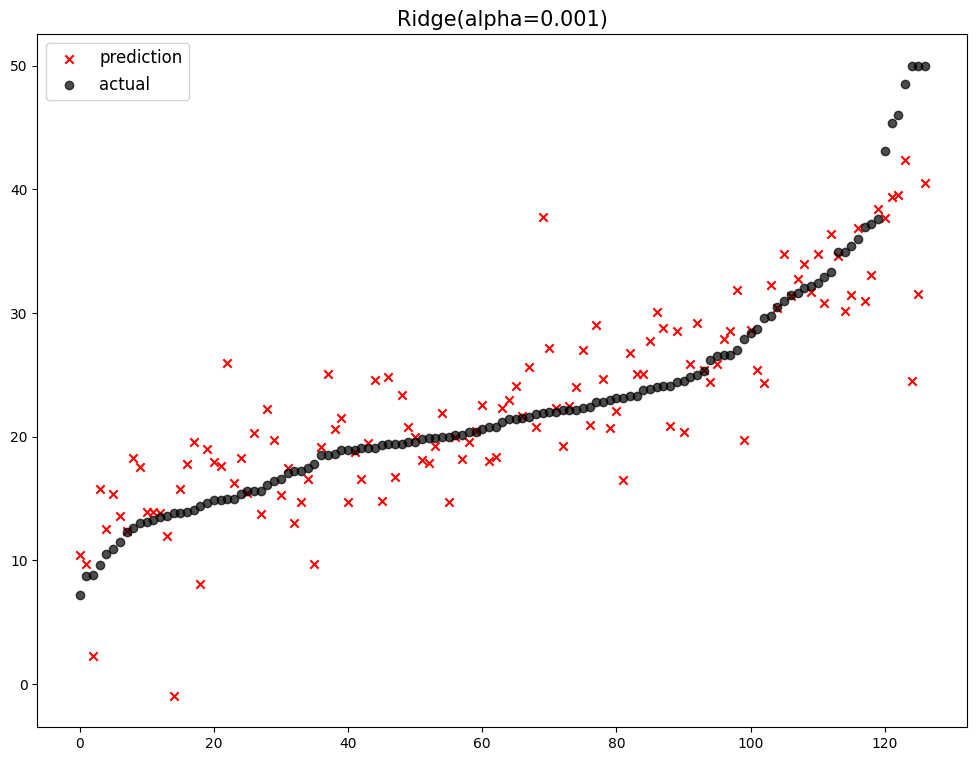

                model        mse
0     Ridge(alpha=10)  26.218671
1    Ridge(alpha=100)  25.740489
2      Ridge(alpha=1)  25.451526
3    Ridge(alpha=0.1)  24.863174
4   Ridge(alpha=0.01)  24.778254
5  Ridge(alpha=0.001)  24.769506
6    LinearRegression  24.768531


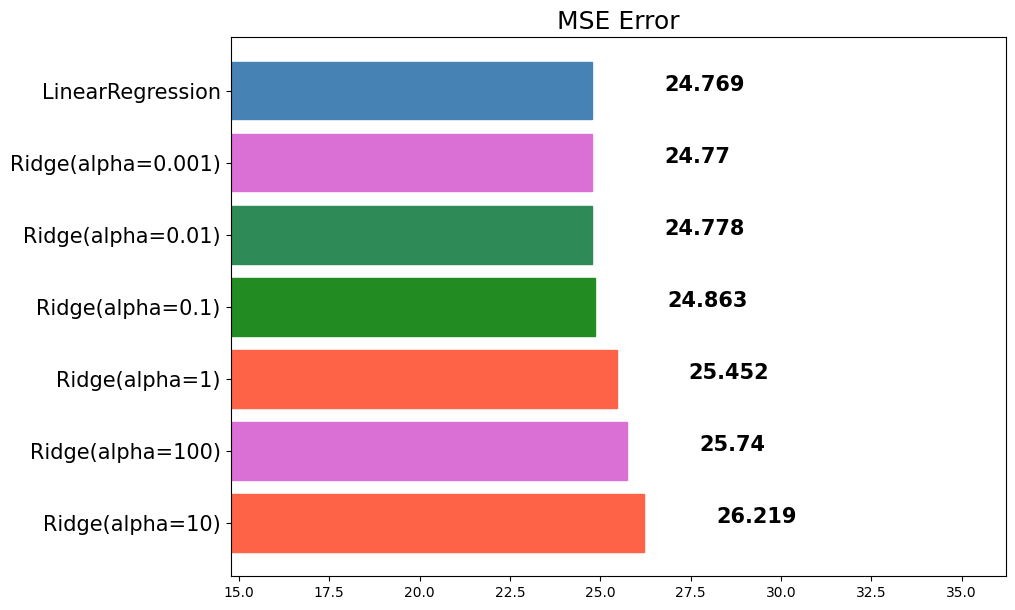

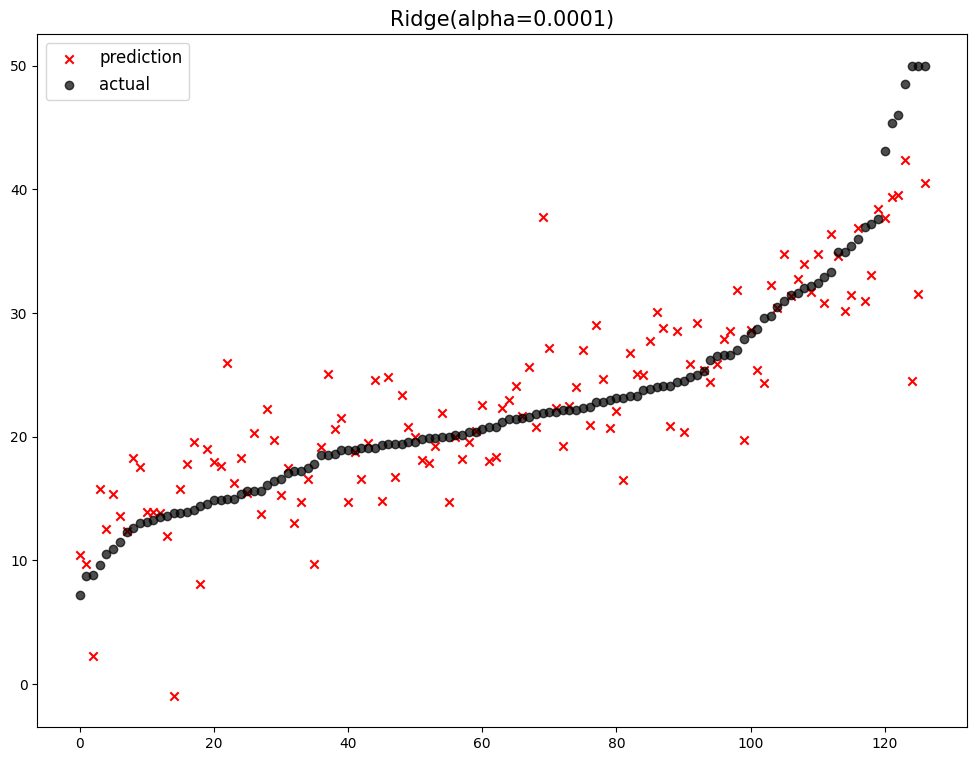

                 model        mse
0      Ridge(alpha=10)  26.218671
1     Ridge(alpha=100)  25.740489
2       Ridge(alpha=1)  25.451526
3     Ridge(alpha=0.1)  24.863174
4    Ridge(alpha=0.01)  24.778254
5   Ridge(alpha=0.001)  24.769506
6  Ridge(alpha=0.0001)  24.768628
7     LinearRegression  24.768531


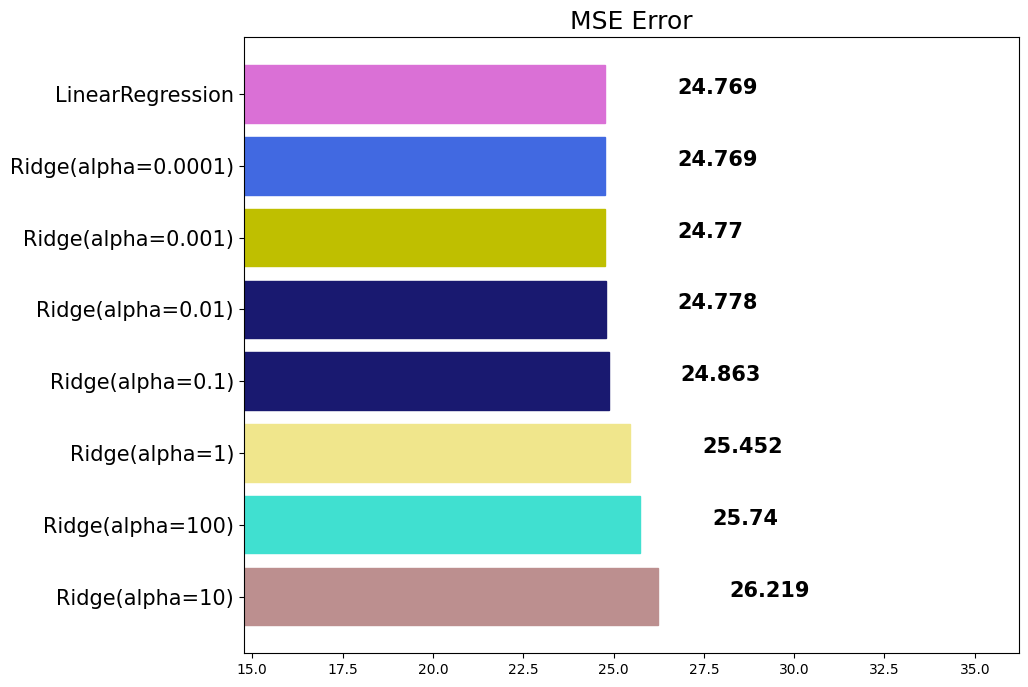

In [ ]:
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(x_train, y_train)
    pred = ridge.predict(x_test)
    mse_eval('Ridge(alpha={})'.format(alpha), pred, y_test)

In [ ]:
x_train.columns

Index(['AGE', 'B', 'RM', 'CRIM', 'DIS', 'INDUS', 'LSTAT', 'NOX', 'PTRATIO',
       'RAD', 'ZN', 'TAX', 'CHAS'],
      dtype='object')

In [ ]:
ridge.coef_

array([ -0.00047035,   0.00662267,   4.35217229,  -0.09789041,
        -1.3771858 ,   0.05914407,  -0.54855269, -15.4888916 ,
        -0.93999663,   0.28208195,   0.042779  ,  -0.01249203,
         1.23146526])

In [ ]:
def plot_coef(columns, coef):
    coef_df = pd.DataFrame(list(zip(columns, coef)))
    coef_df.columns=['feature', 'coef']
    coef_df = coef_df.sort_values('coef', ascending=False).reset_index(drop=True)

    fig, ax = plt.subplots(figsize=(9, 7))
    ax.barh(np.arange(len(coef_df)), coef_df['coef'])
    idx = np.arange(len(coef_df))
    ax.set_yticks(idx)
    ax.set_yticklabels(coef_df['feature'])
    fig.tight_layout()
    plt.show()

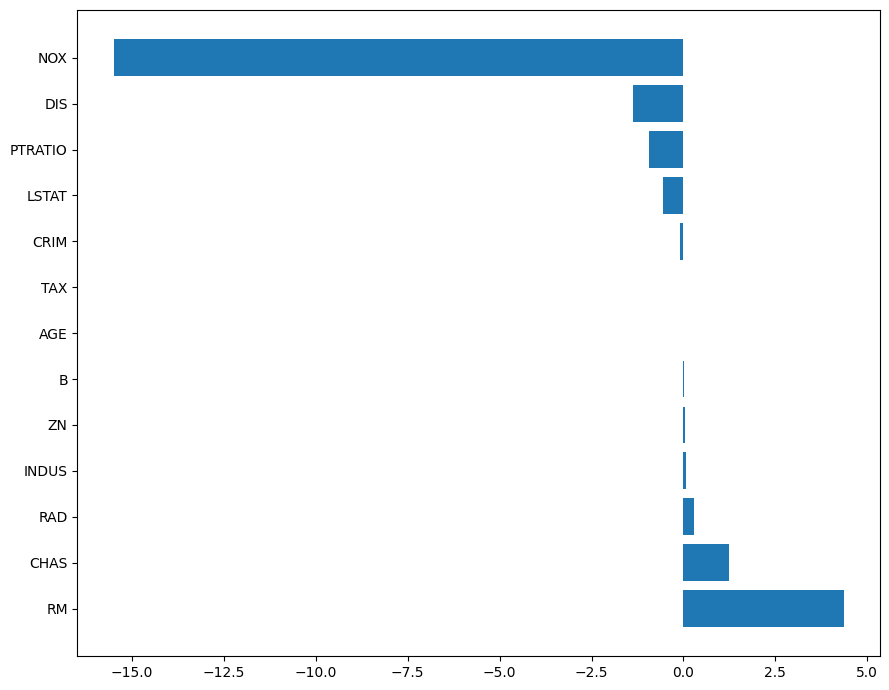

In [ ]:
plot_coef(x_train.columns, ridge.coef_)

alpha 값에 따른 coef 의 차이를 확인해 봅시다

In [ ]:
ridge_100 = Ridge(alpha=100)
ridge_100.fit(x_train, y_train)
ridge_pred_100 = ridge_100.predict(x_test)

ridge_001 = Ridge(alpha=0.001)
ridge_001.fit(x_train, y_train)
ridge_pred_001 = ridge_001.predict(x_test)

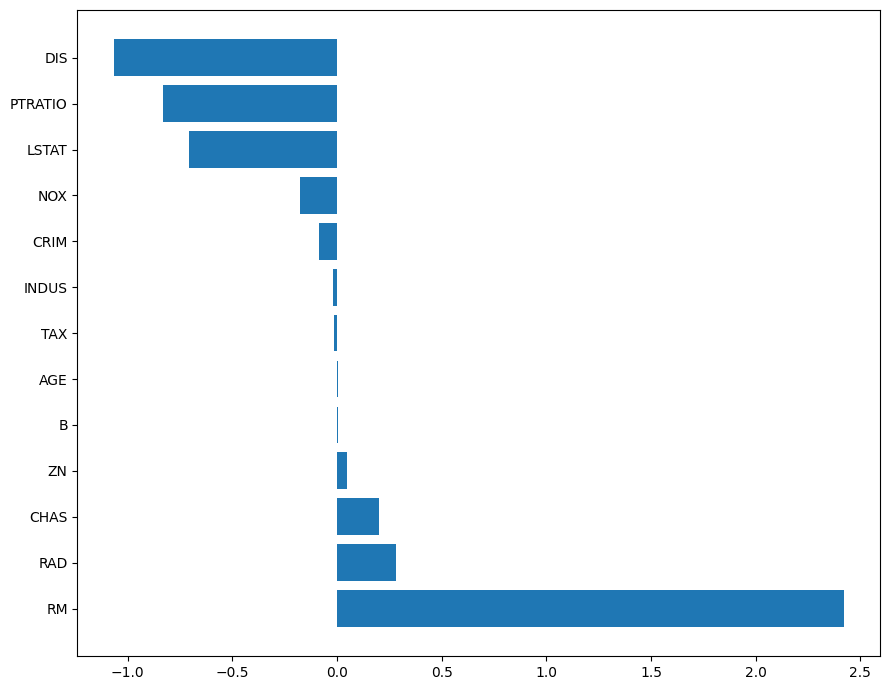

In [ ]:
plot_coef(x_train.columns, ridge_100.coef_)

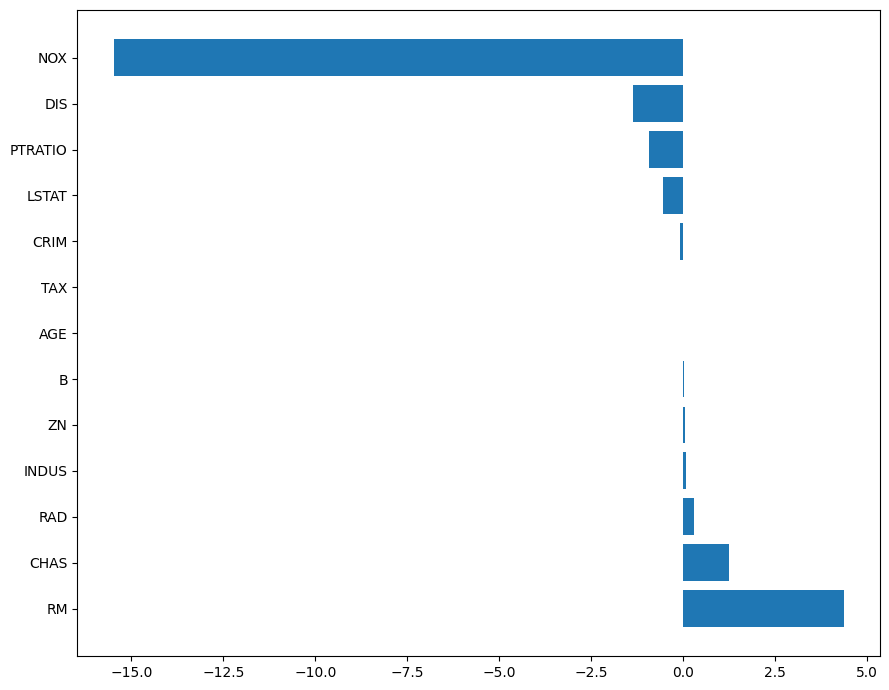

In [ ]:
plot_coef(x_train.columns, ridge_001.coef_)

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
# 값이 커질 수록 큰 규제입니다.
# alpha값이 커질수록 직선에 가까워진다.
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

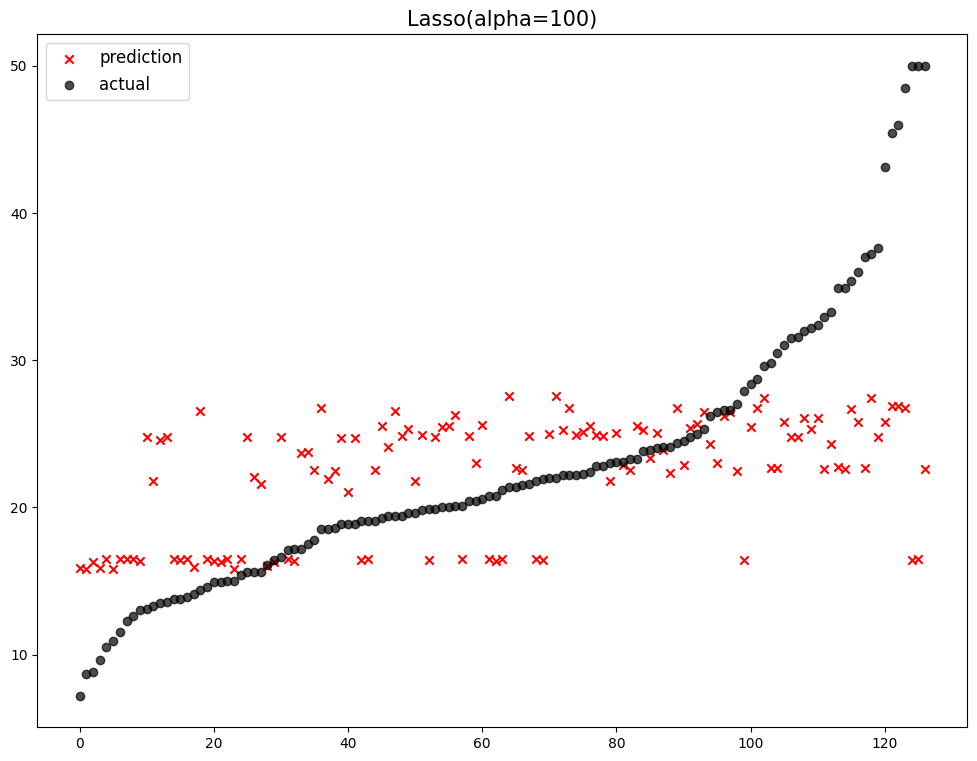

                 model        mse
0     Lasso(alpha=100)  65.923547
1      Ridge(alpha=10)  26.218671
2     Ridge(alpha=100)  25.740489
3       Ridge(alpha=1)  25.451526
4     Ridge(alpha=0.1)  24.863174
5    Ridge(alpha=0.01)  24.778254
6   Ridge(alpha=0.001)  24.769506
7  Ridge(alpha=0.0001)  24.768628
8     LinearRegression  24.768531


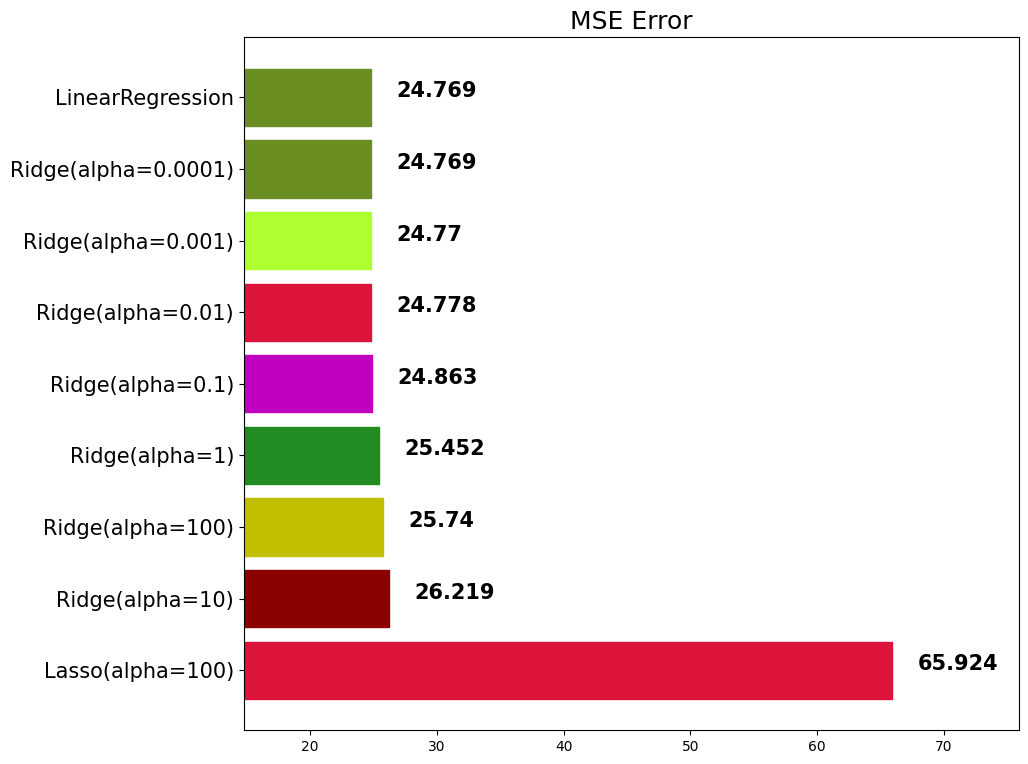

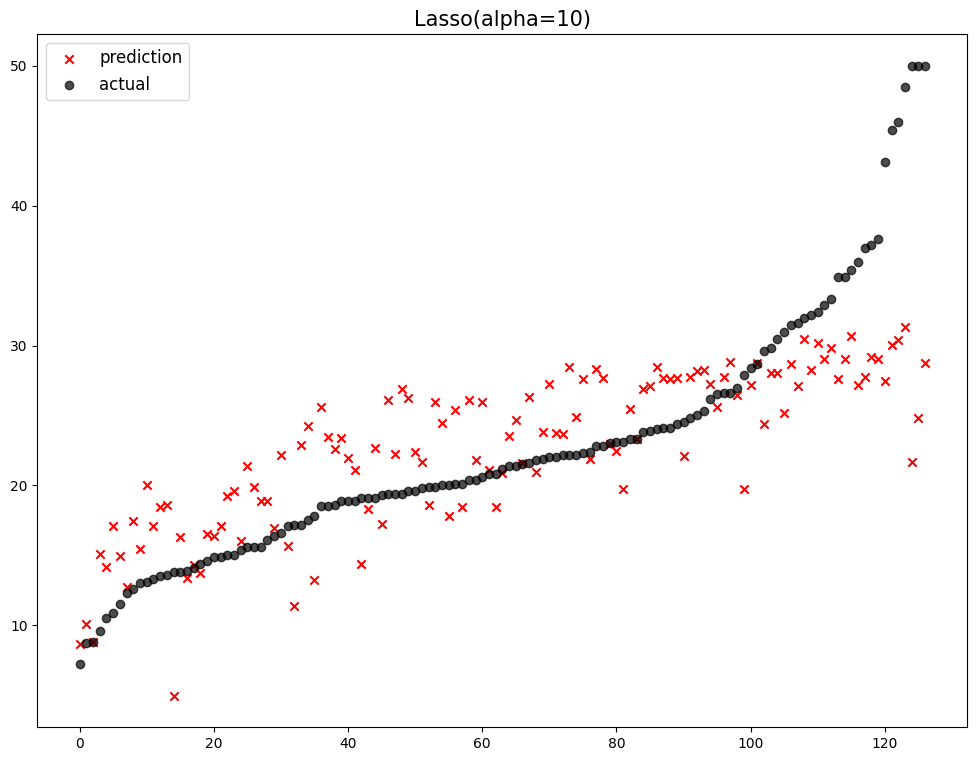

                 model        mse
0     Lasso(alpha=100)  65.923547
1      Lasso(alpha=10)  39.180052
2      Ridge(alpha=10)  26.218671
3     Ridge(alpha=100)  25.740489
4       Ridge(alpha=1)  25.451526
5     Ridge(alpha=0.1)  24.863174
6    Ridge(alpha=0.01)  24.778254
7   Ridge(alpha=0.001)  24.769506
8  Ridge(alpha=0.0001)  24.768628
9     LinearRegression  24.768531


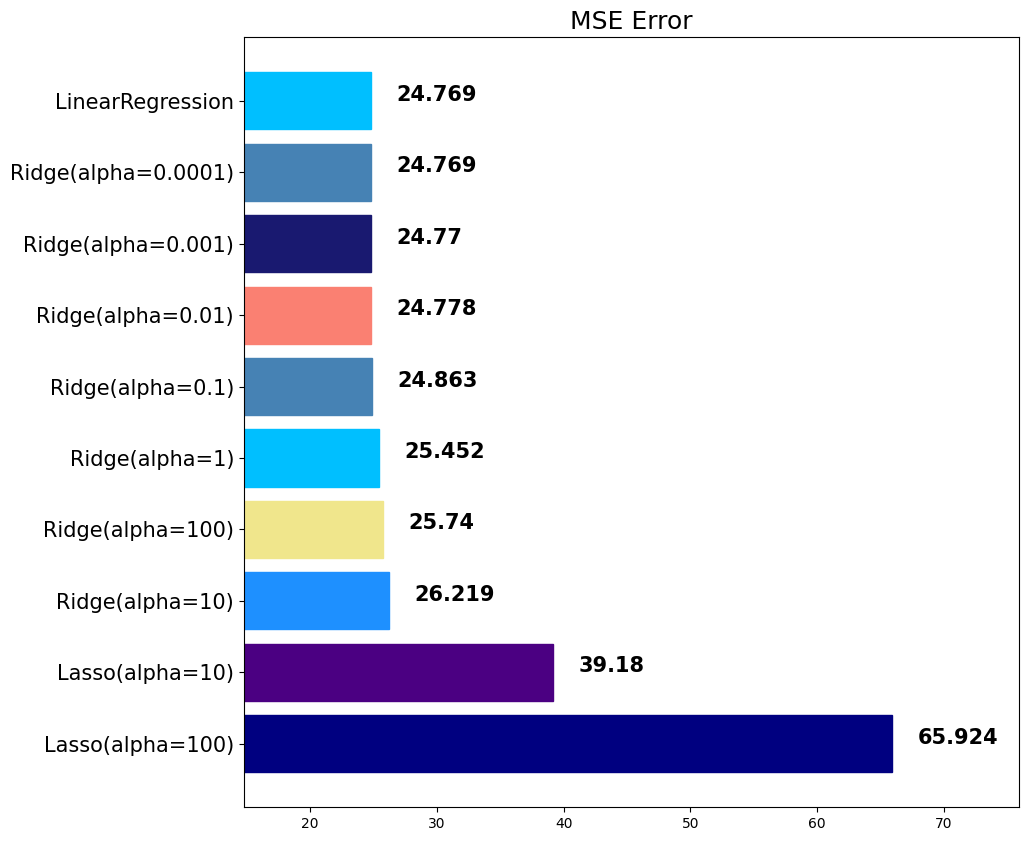

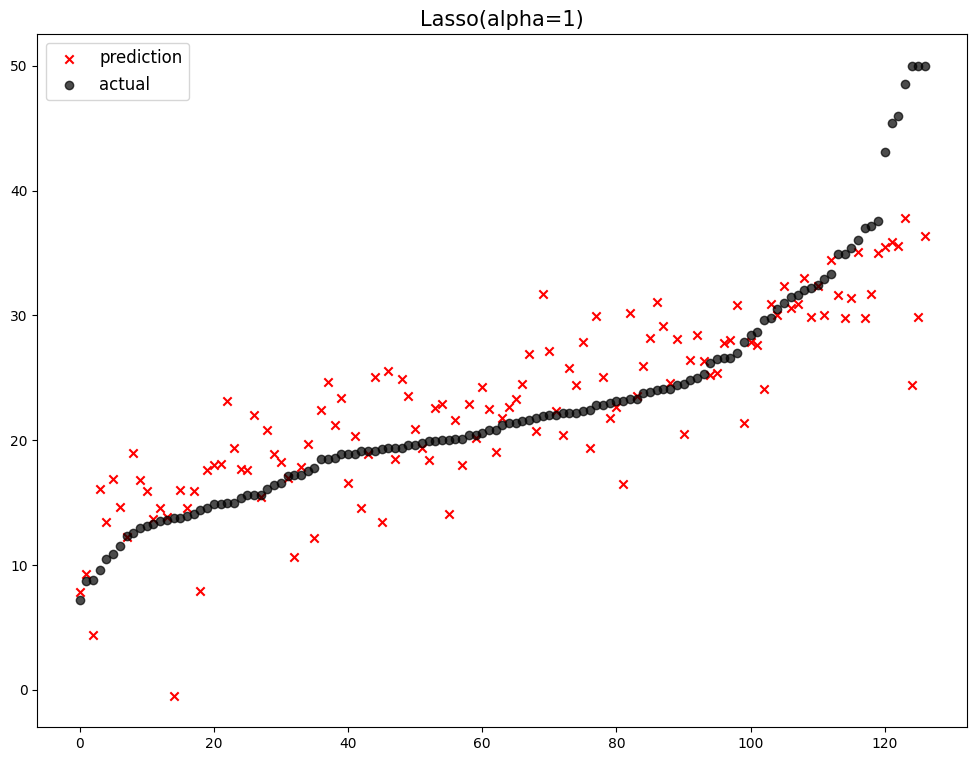

                  model        mse
0      Lasso(alpha=100)  65.923547
1       Lasso(alpha=10)  39.180052
2        Lasso(alpha=1)  27.198976
3       Ridge(alpha=10)  26.218671
4      Ridge(alpha=100)  25.740489
5        Ridge(alpha=1)  25.451526
6      Ridge(alpha=0.1)  24.863174
7     Ridge(alpha=0.01)  24.778254
8    Ridge(alpha=0.001)  24.769506
9   Ridge(alpha=0.0001)  24.768628
10     LinearRegression  24.768531


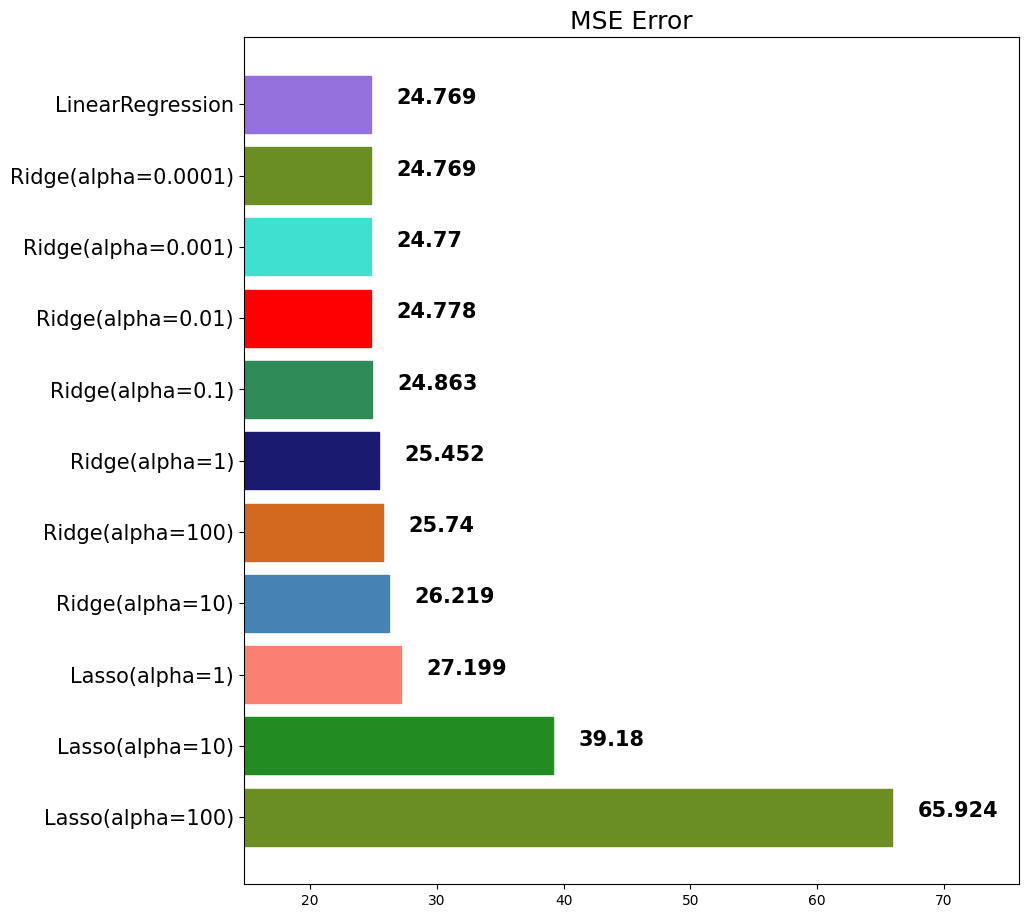

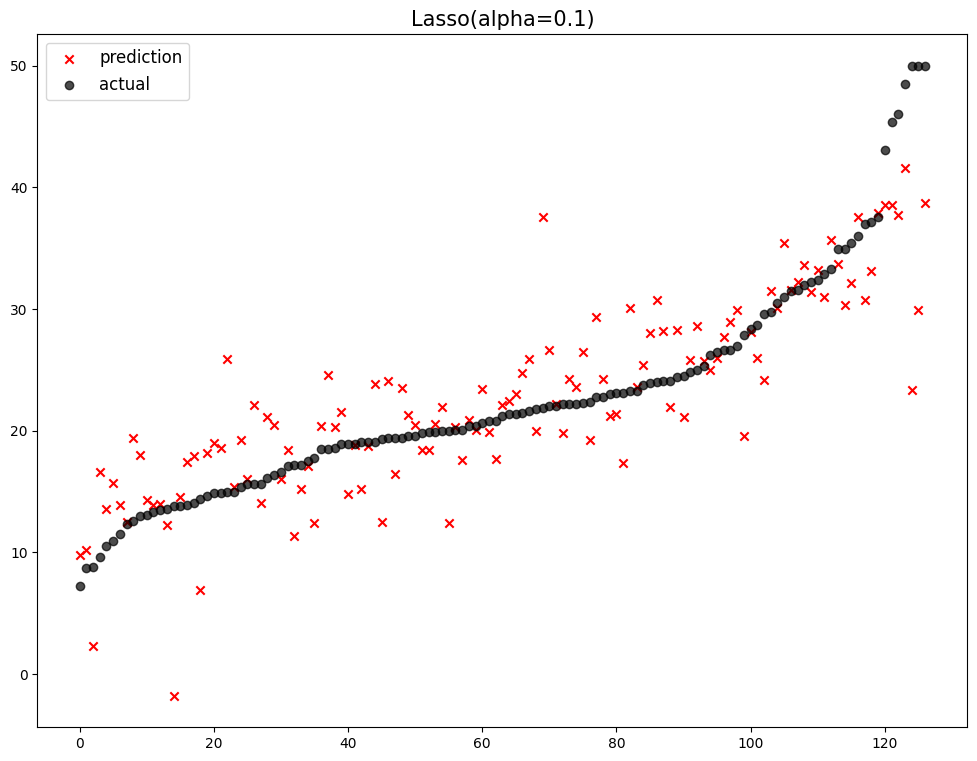

                  model        mse
0      Lasso(alpha=100)  65.923547
1       Lasso(alpha=10)  39.180052
2        Lasso(alpha=1)  27.198976
3      Lasso(alpha=0.1)  27.128990
4       Ridge(alpha=10)  26.218671
5      Ridge(alpha=100)  25.740489
6        Ridge(alpha=1)  25.451526
7      Ridge(alpha=0.1)  24.863174
8     Ridge(alpha=0.01)  24.778254
9    Ridge(alpha=0.001)  24.769506
10  Ridge(alpha=0.0001)  24.768628
11     LinearRegression  24.768531


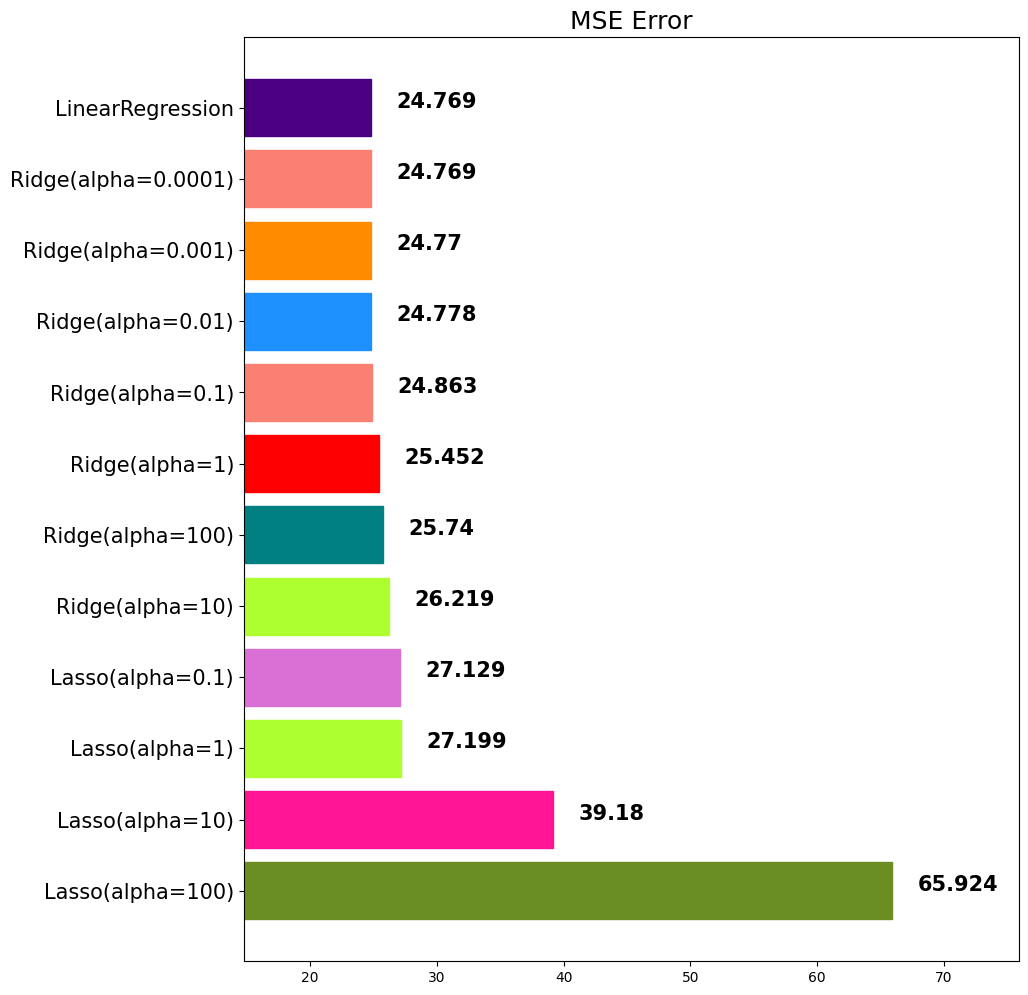

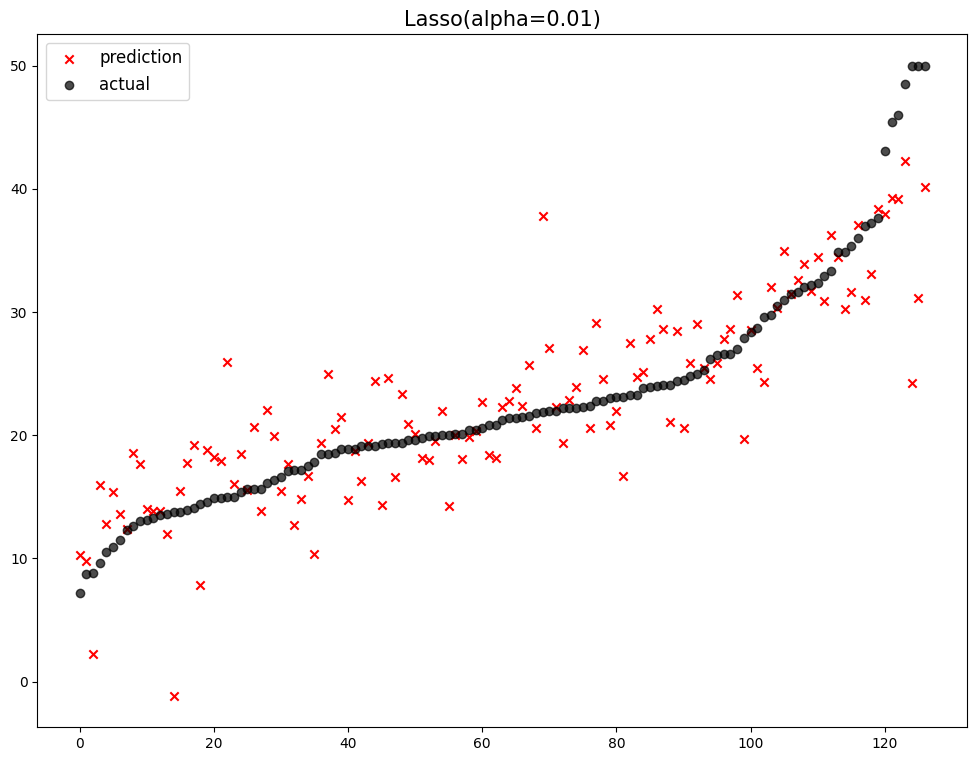

                  model        mse
0      Lasso(alpha=100)  65.923547
1       Lasso(alpha=10)  39.180052
2        Lasso(alpha=1)  27.198976
3      Lasso(alpha=0.1)  27.128990
4       Ridge(alpha=10)  26.218671
5      Ridge(alpha=100)  25.740489
6        Ridge(alpha=1)  25.451526
7     Lasso(alpha=0.01)  25.145844
8      Ridge(alpha=0.1)  24.863174
9     Ridge(alpha=0.01)  24.778254
10   Ridge(alpha=0.001)  24.769506
11  Ridge(alpha=0.0001)  24.768628
12     LinearRegression  24.768531


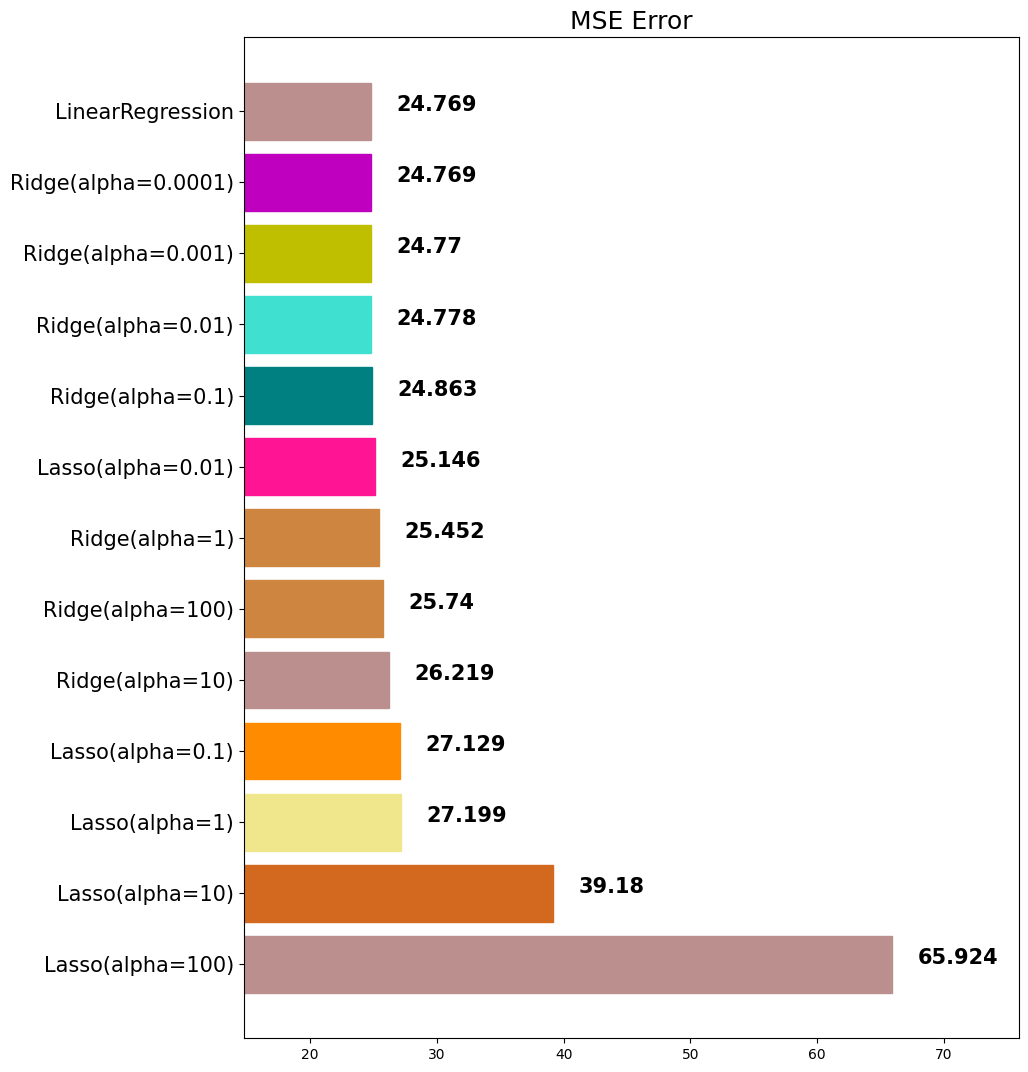

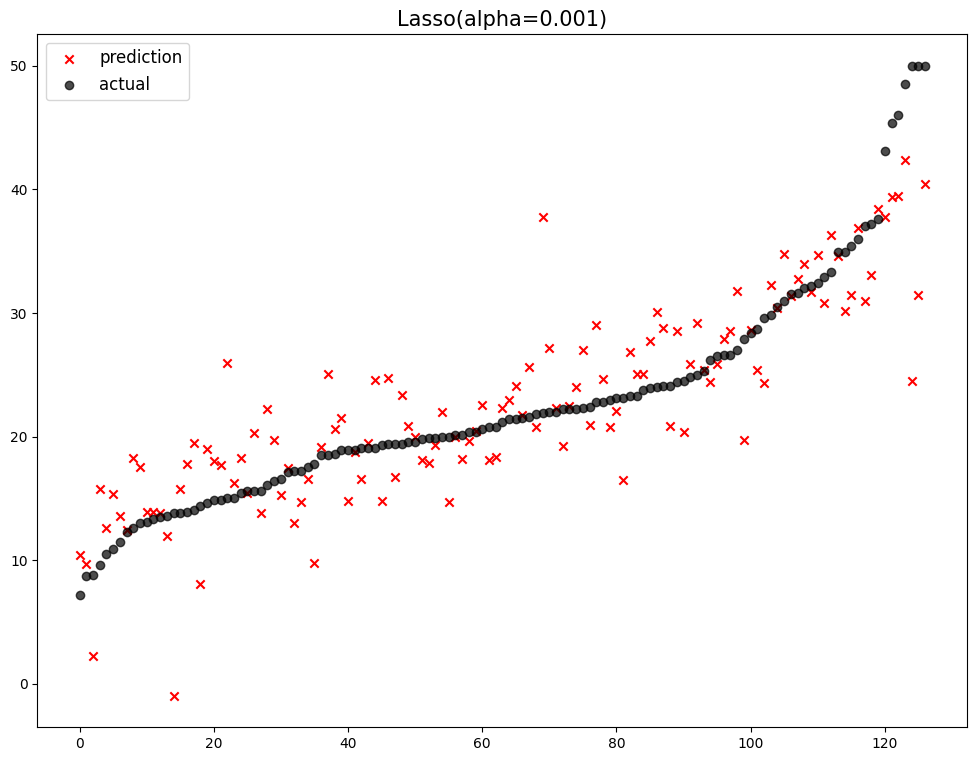

                  model        mse
0      Lasso(alpha=100)  65.923547
1       Lasso(alpha=10)  39.180052
2        Lasso(alpha=1)  27.198976
3      Lasso(alpha=0.1)  27.128990
4       Ridge(alpha=10)  26.218671
5      Ridge(alpha=100)  25.740489
6        Ridge(alpha=1)  25.451526
7     Lasso(alpha=0.01)  25.145844
8      Ridge(alpha=0.1)  24.863174
9    Lasso(alpha=0.001)  24.802160
10    Ridge(alpha=0.01)  24.778254
11   Ridge(alpha=0.001)  24.769506
12  Ridge(alpha=0.0001)  24.768628
13     LinearRegression  24.768531


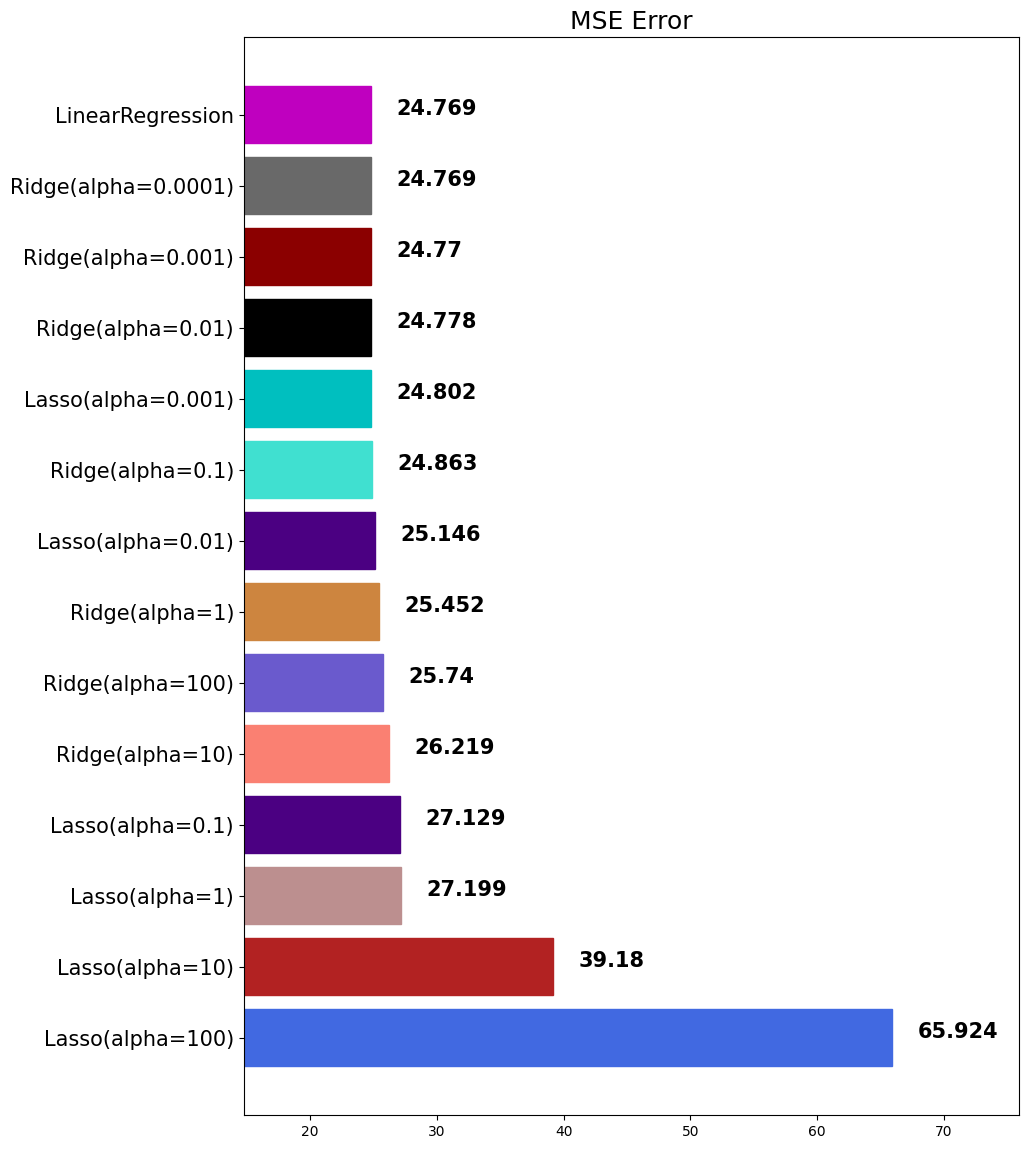

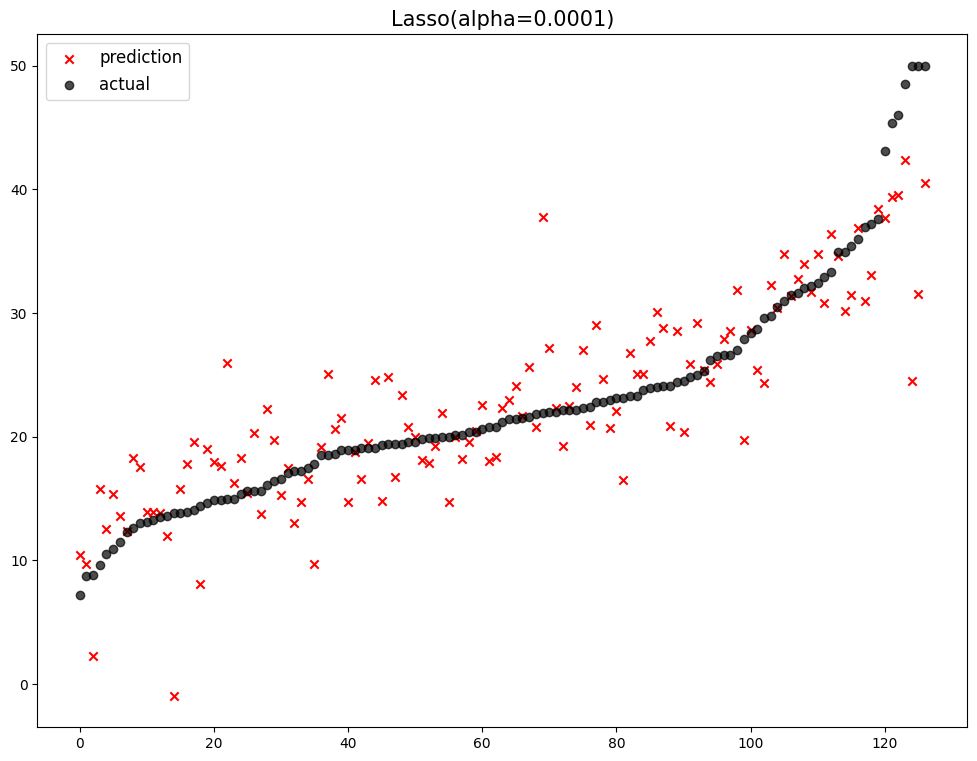

                  model        mse
0      Lasso(alpha=100)  65.923547
1       Lasso(alpha=10)  39.180052
2        Lasso(alpha=1)  27.198976
3      Lasso(alpha=0.1)  27.128990
4       Ridge(alpha=10)  26.218671
5      Ridge(alpha=100)  25.740489
6        Ridge(alpha=1)  25.451526
7     Lasso(alpha=0.01)  25.145844
8      Ridge(alpha=0.1)  24.863174
9    Lasso(alpha=0.001)  24.802160
10    Ridge(alpha=0.01)  24.778254
11  Lasso(alpha=0.0001)  24.771853
12   Ridge(alpha=0.001)  24.769506
13  Ridge(alpha=0.0001)  24.768628
14     LinearRegression  24.768531


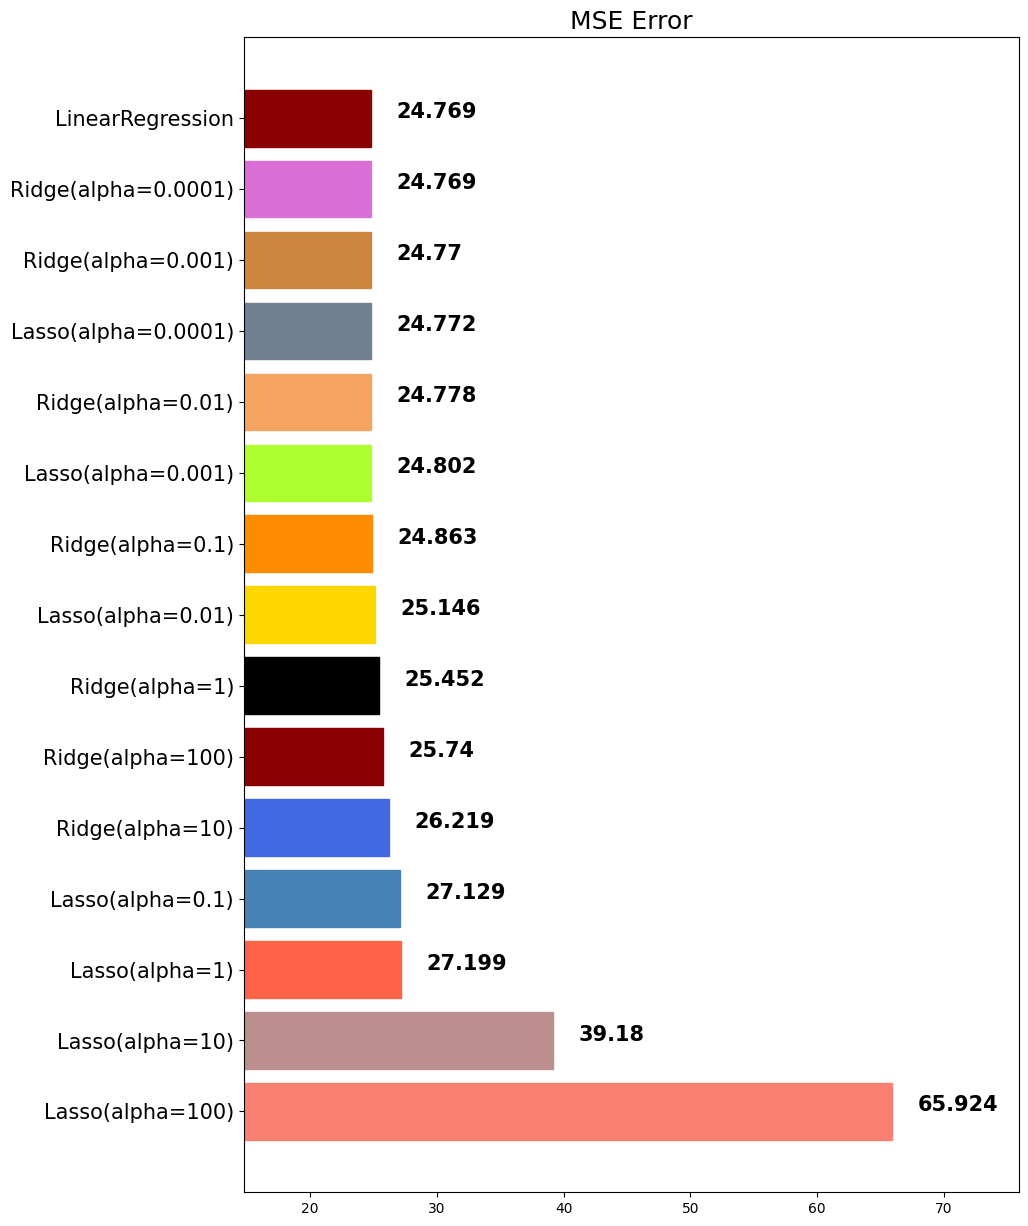

In [ ]:
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(x_train, y_train)
    pred = lasso.predict(x_test)
    mse_eval('Lasso(alpha={})'.format(alpha), pred, y_test)

In [ ]:
lasso_100 = Lasso(alpha=100)
lasso_100.fit(x_train, y_train)
lasso_pred_100 = lasso_100.predict(x_test)

lasso_001 = Lasso(alpha=0.001)
lasso_001.fit(x_train, y_train)
lasso_pred_001 = lasso_001.predict(x_test)

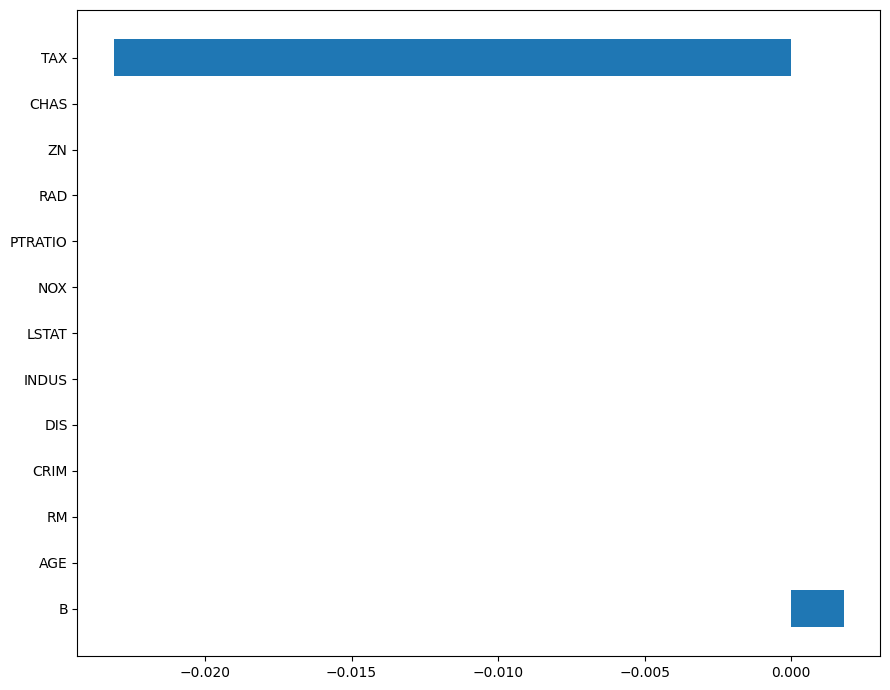

In [ ]:
plot_coef(x_train.columns, lasso_100.coef_)

In [ ]:
lasso_100.coef_

array([-0.        ,  0.00179033,  0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.02310938,  0.        ])

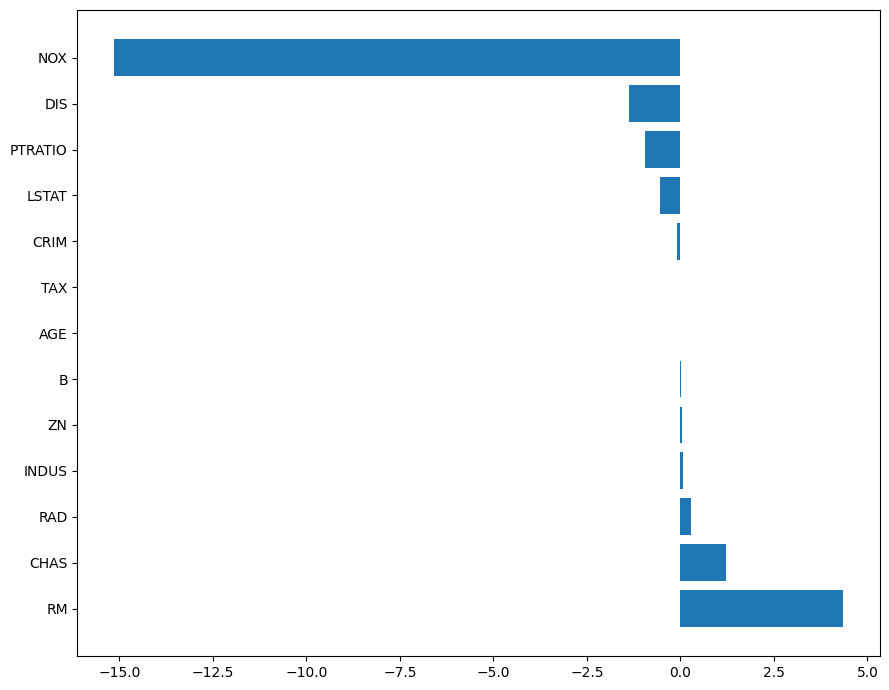

In [ ]:
plot_coef(x_train.columns, lasso_001.coef_)

In [ ]:
lasso_001.coef_

array([ -0.00072575,   0.00664126,   4.35419745,  -0.09772684,
        -1.37157647,   0.0578034 ,  -0.54910636, -15.14381258,
        -0.93632497,   0.28117592,   0.04279191,  -0.01251771,
         1.20684452])

### ElasticNet

* 엘라스틱넷은 릿지 회귀와 라쏘 회귀를 절충한 모델이다.
* 규제항은 릿지와 회귀의 규제항을 단순히 더해서 사용 한다.
* 혼합 정도는 혼합 비율r을 사용해 조절한다.
* r=0이면 엘라스틱넷은 릿지 회귀와 같고, r=1이면 라쏘 회귀와 같다.

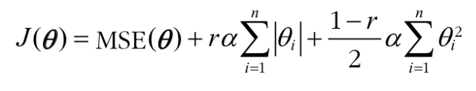

**l1_ratio (default=0.5)**

 * l1_ratio = 0 (L2 규제만 사용).
 * l1_ratio = 1 (L1 규제만 사용).
 * 0 < l1_ratio < 1 (L1 and L2 규제의 혼합사용)

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
# ratios가 수식의 r이다.
ratios = [0.2, 0.5, 0.8]

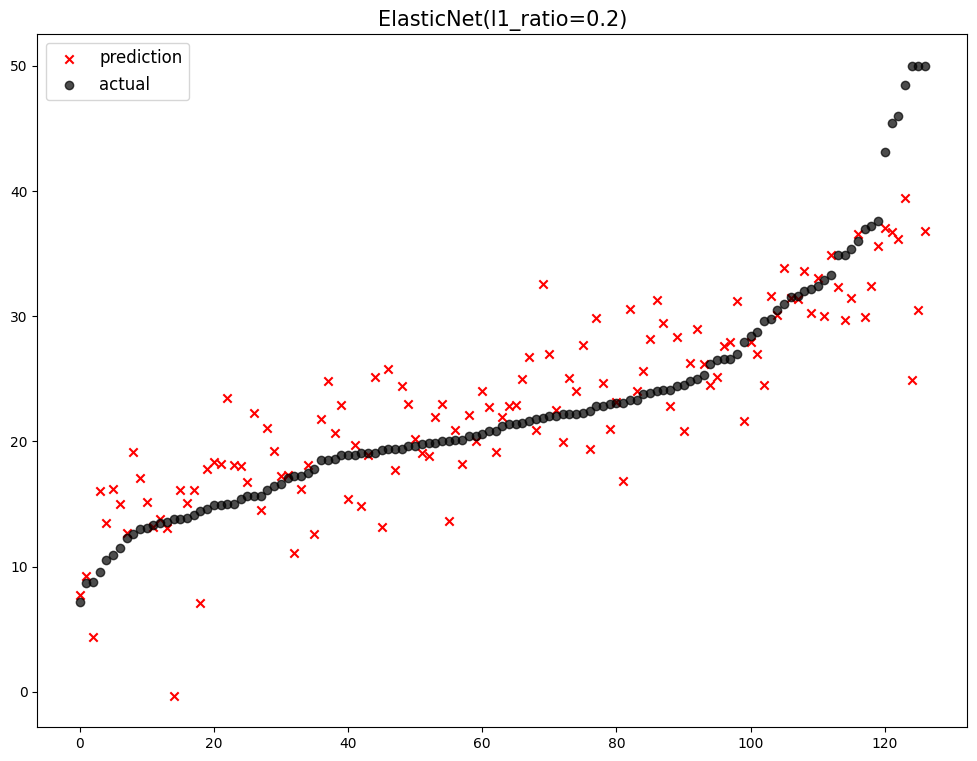

                       model        mse
0           Lasso(alpha=100)  65.923547
1            Lasso(alpha=10)  39.180052
2             Lasso(alpha=1)  27.198976
3           Lasso(alpha=0.1)  27.128990
4            Ridge(alpha=10)  26.218671
5   ElasticNet(l1_ratio=0.2)  26.027322
6           Ridge(alpha=100)  25.740489
7             Ridge(alpha=1)  25.451526
8          Lasso(alpha=0.01)  25.145844
9           Ridge(alpha=0.1)  24.863174
10        Lasso(alpha=0.001)  24.802160
11         Ridge(alpha=0.01)  24.778254
12       Lasso(alpha=0.0001)  24.771853
13        Ridge(alpha=0.001)  24.769506
14       Ridge(alpha=0.0001)  24.768628
15          LinearRegression  24.768531


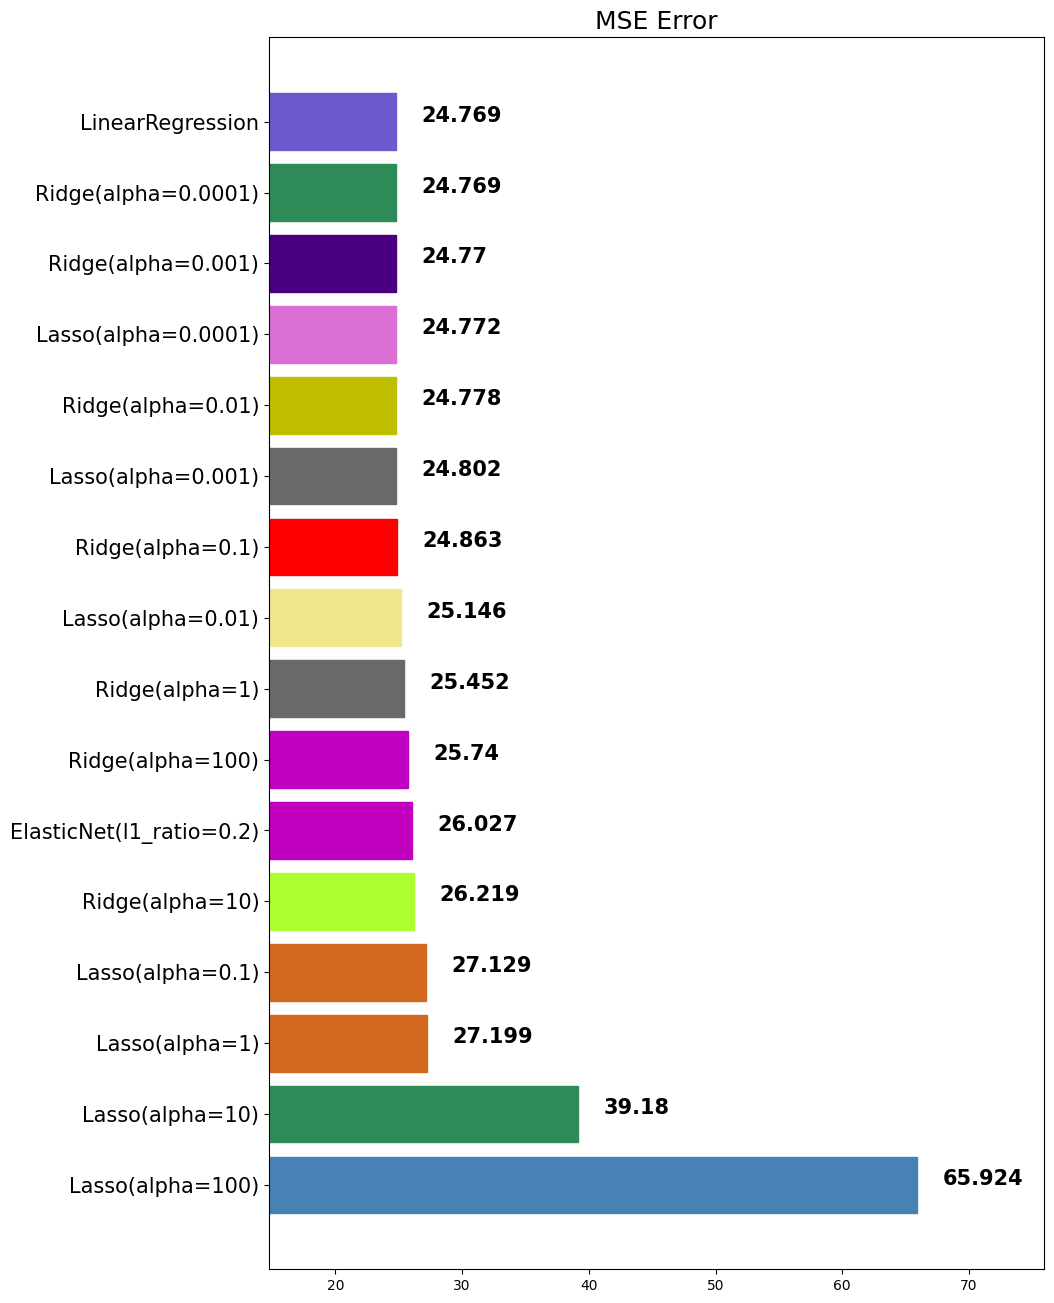

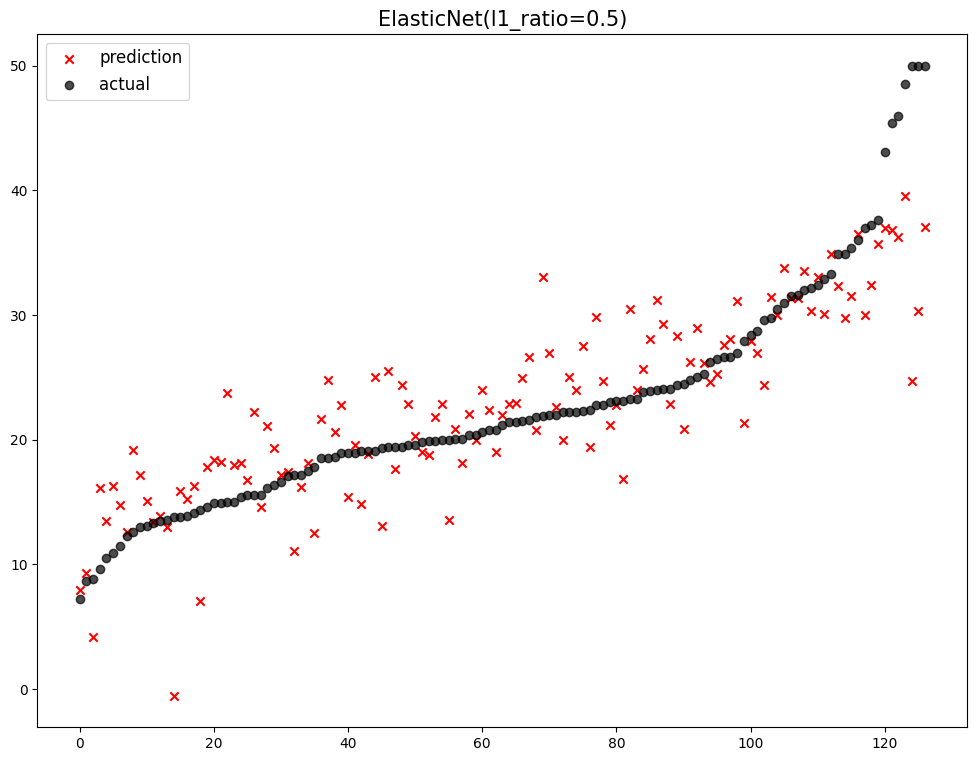

                       model        mse
0           Lasso(alpha=100)  65.923547
1            Lasso(alpha=10)  39.180052
2             Lasso(alpha=1)  27.198976
3           Lasso(alpha=0.1)  27.128990
4            Ridge(alpha=10)  26.218671
5   ElasticNet(l1_ratio=0.5)  26.151010
6   ElasticNet(l1_ratio=0.2)  26.027322
7           Ridge(alpha=100)  25.740489
8             Ridge(alpha=1)  25.451526
9          Lasso(alpha=0.01)  25.145844
10          Ridge(alpha=0.1)  24.863174
11        Lasso(alpha=0.001)  24.802160
12         Ridge(alpha=0.01)  24.778254
13       Lasso(alpha=0.0001)  24.771853
14        Ridge(alpha=0.001)  24.769506
15       Ridge(alpha=0.0001)  24.768628
16          LinearRegression  24.768531


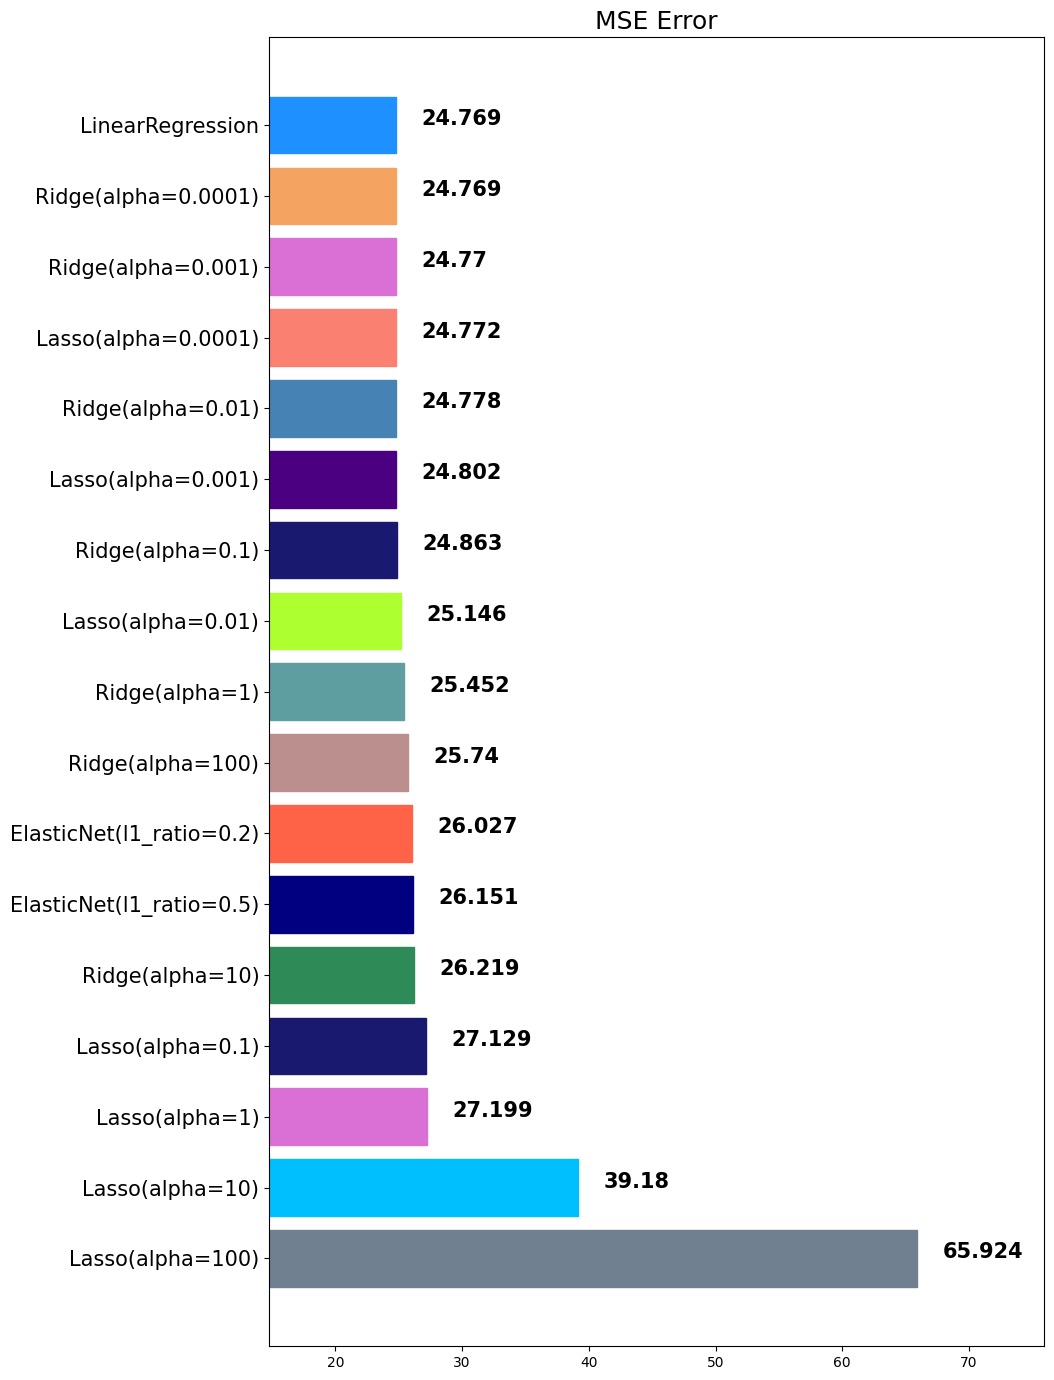

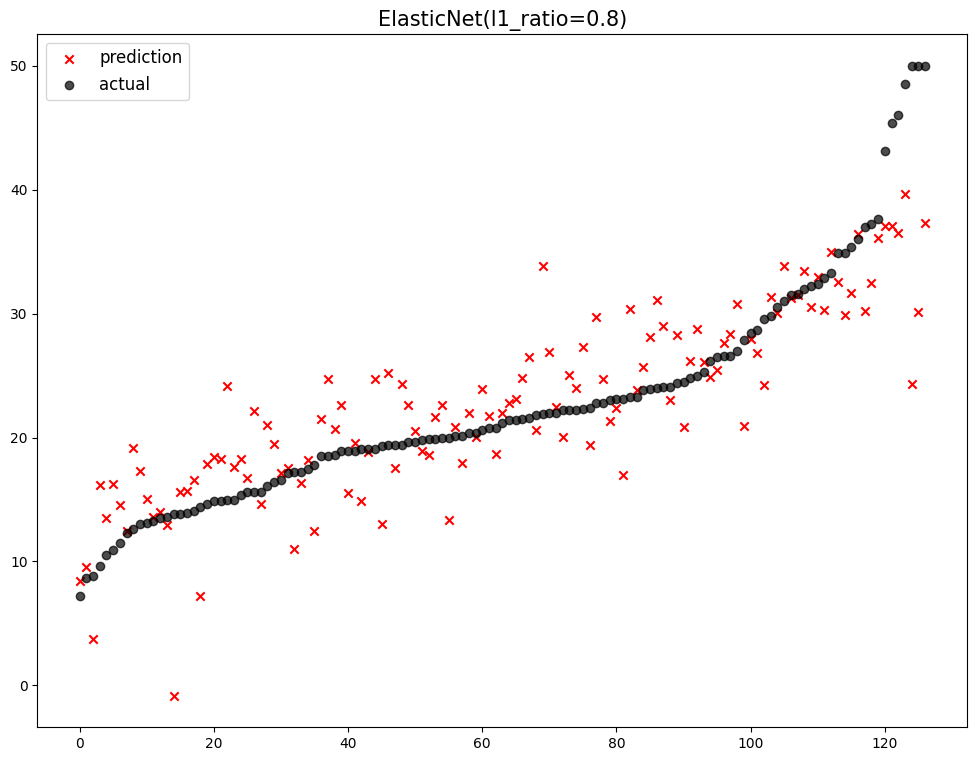

                       model        mse
0           Lasso(alpha=100)  65.923547
1            Lasso(alpha=10)  39.180052
2             Lasso(alpha=1)  27.198976
3           Lasso(alpha=0.1)  27.128990
4   ElasticNet(l1_ratio=0.8)  26.316621
5            Ridge(alpha=10)  26.218671
6   ElasticNet(l1_ratio=0.5)  26.151010
7   ElasticNet(l1_ratio=0.2)  26.027322
8           Ridge(alpha=100)  25.740489
9             Ridge(alpha=1)  25.451526
10         Lasso(alpha=0.01)  25.145844
11          Ridge(alpha=0.1)  24.863174
12        Lasso(alpha=0.001)  24.802160
13         Ridge(alpha=0.01)  24.778254
14       Lasso(alpha=0.0001)  24.771853
15        Ridge(alpha=0.001)  24.769506
16       Ridge(alpha=0.0001)  24.768628
17          LinearRegression  24.768531


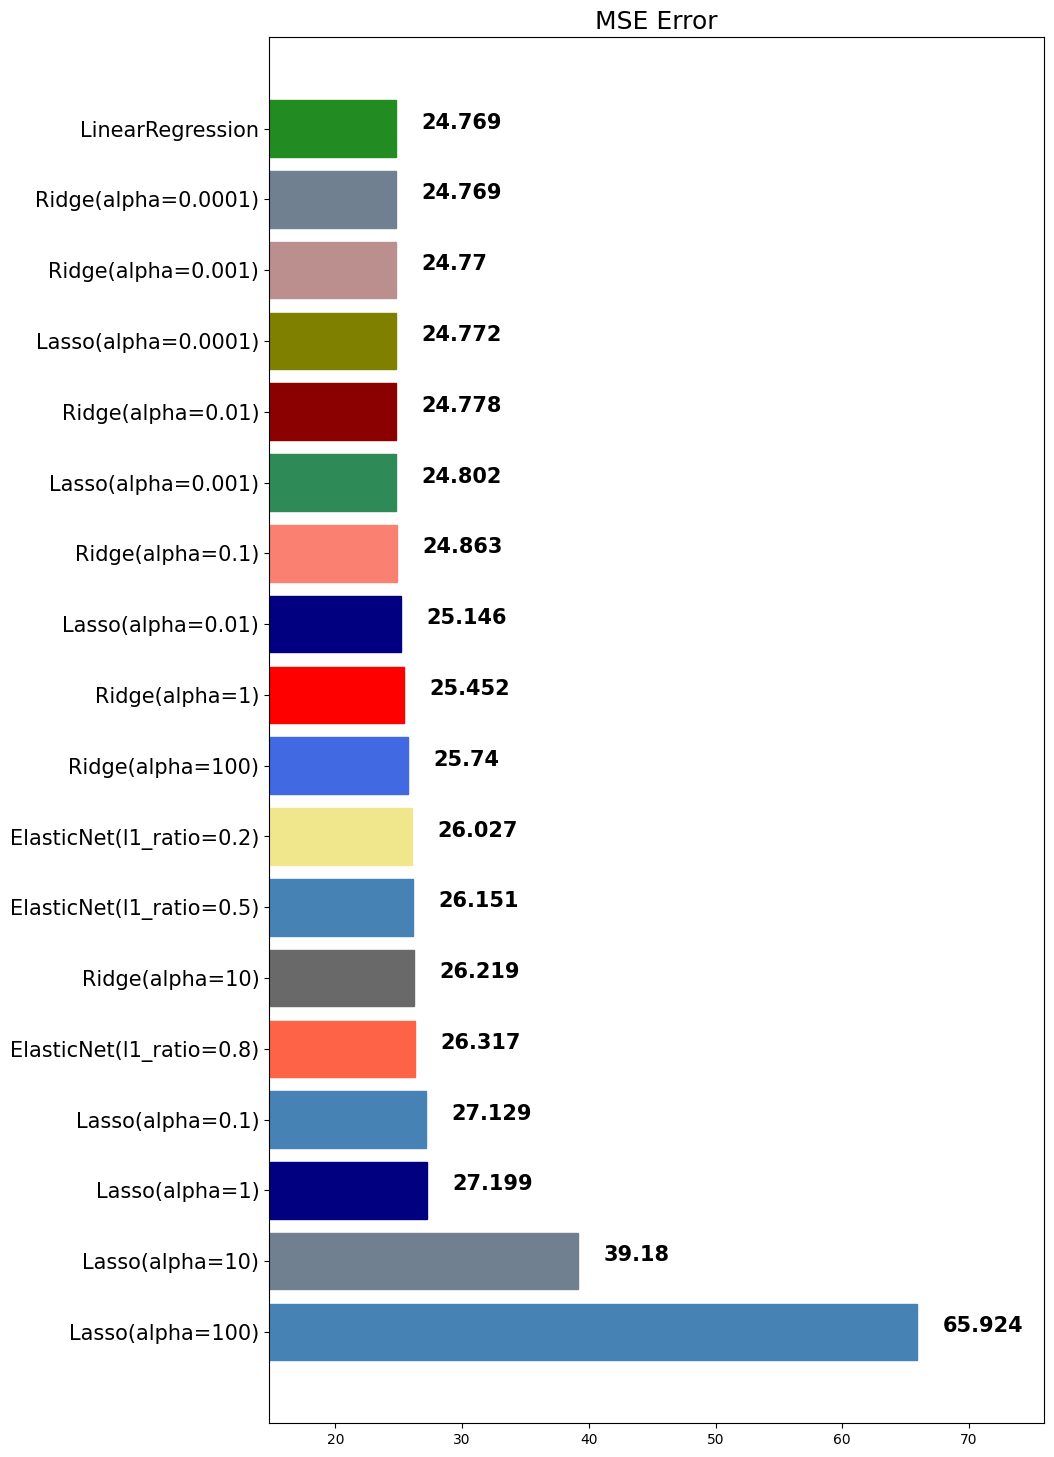

In [ ]:
for ratio in ratios:
    elasticnet = ElasticNet(alpha=0.5, l1_ratio=ratio)
    elasticnet.fit(x_train, y_train)
    pred = elasticnet.predict(x_test)
    mse_eval('ElasticNet(l1_ratio={})'.format(ratio), pred, y_test)

In [ ]:
elsticnet_20 = ElasticNet(alpha=5, l1_ratio=0.2)
elsticnet_20.fit(x_train, y_train)
elasticnet_pred_20 = elsticnet_20.predict(x_test)

elsticnet_80 = ElasticNet(alpha=5, l1_ratio=0.8)
elsticnet_80.fit(x_train, y_train)
elasticnet_pred_80 = elsticnet_80.predict(x_test)

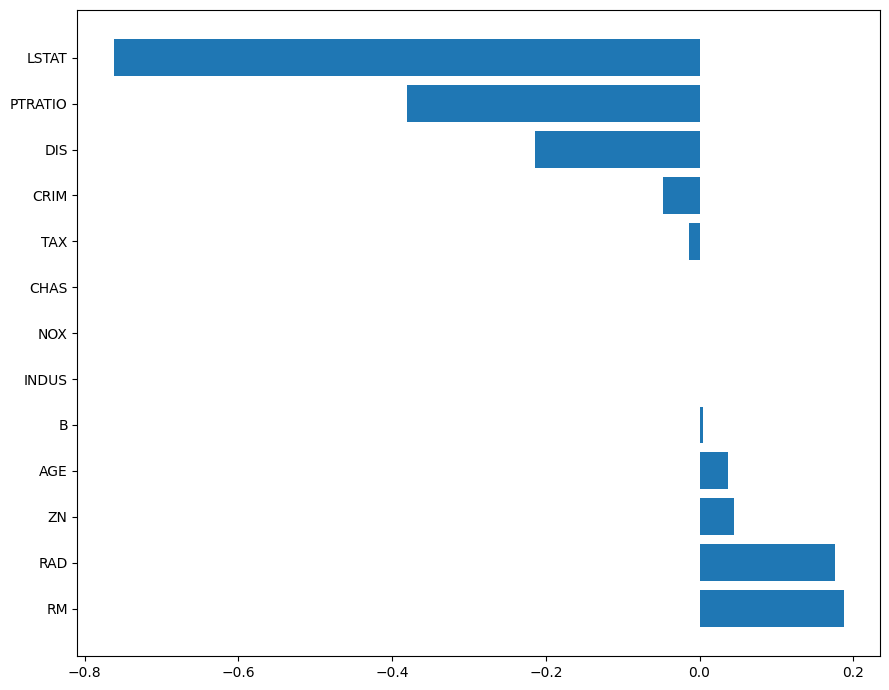

In [ ]:
plot_coef(x_train.columns, elsticnet_20.coef_)

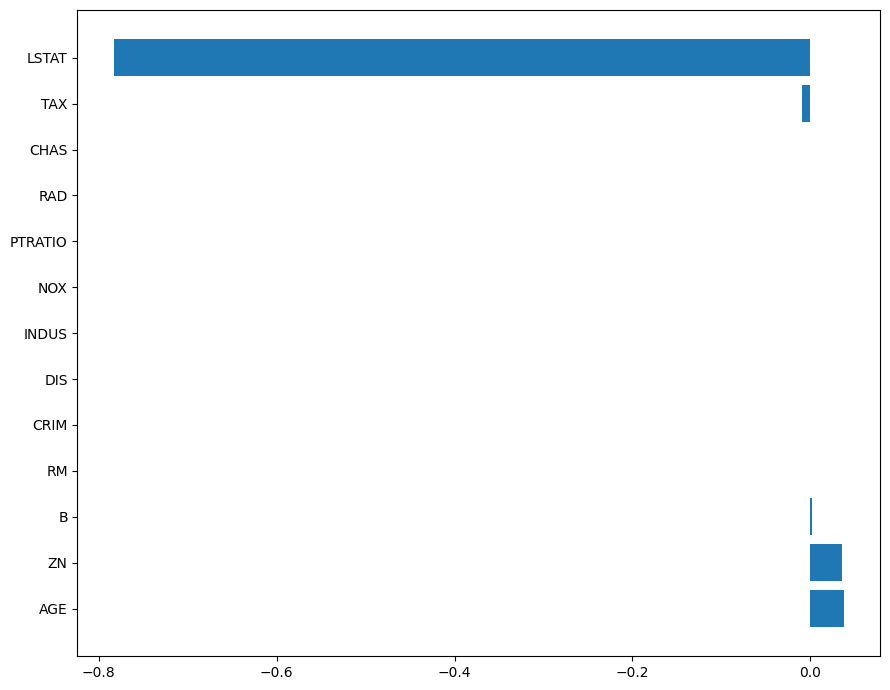

In [ ]:
plot_coef(x_train.columns, elsticnet_80.coef_)

In [ ]:
elsticnet_80.coef_

array([ 0.03737636,  0.00233917,  0.        , -0.        , -0.        ,
       -0.        , -0.7829078 ,  0.        , -0.        ,  0.        ,
        0.03571944, -0.00890903,  0.        ])

## Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [ ]:
x_train.describe()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,68.588391,357.715488,6.283594,3.613106,3.776124,11.167520,12.770158,0.554760,18.455409,9.461741,10.757256,406.282322,0.060686
std,28.200508,91.543433,0.713708,9.010515,2.106978,6.875301,7.182040,0.115683,2.140141,8.599279,22.412656,168.267430,0.239069
min,6.000000,0.320000,3.561000,0.013010,1.169100,0.460000,1.730000,0.392000,12.600000,1.000000,0.000000,187.000000,0.000000
25%,43.900000,376.715000,5.890000,0.082325,2.100350,5.190000,7.130000,0.453000,17.400000,4.000000,0.000000,279.000000,0.000000
50%,77.300000,392.180000,6.195000,0.253560,3.102500,9.690000,11.450000,0.538000,19.000000,5.000000,0.000000,330.000000,0.000000
75%,93.700000,396.220000,6.618500,3.630895,5.116700,18.100000,17.115000,0.624000,20.200000,24.000000,12.500000,666.000000,0.000000
max,100.000000,396.900000,8.725000,88.976200,12.126500,27.740000,36.980000,0.871000,22.000000,24.000000,100.000000,711.000000,1.000000


### StandardScaler

평균(mean)을 0, 표준편차(std)를 1로 만들어 주는 스케일러

In [ ]:
std_scaler = StandardScaler()

In [ ]:
std_scaled = std_scaler.fit_transform(x_train)

In [ ]:
round(pd.DataFrame(std_scaled).describe(), 2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00
mean,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.22,-3.91,-3.82,-0.40,-1.24,-1.56,-1.54,-1.41,-2.74,-0.99,-0.48,-1.30,-0.25
25%,-0.88,0.21,-0.55,-0.39,-0.80,-0.87,-0.79,-0.88,-0.49,-0.64,-0.48,-0.76,-0.25
50%,0.31,0.38,-0.12,-0.37,-0.32,-0.22,-0.18,-0.15,0.25,-0.52,-0.48,-0.45,-0.25
75%,0.89,0.42,0.47,0.00,0.64,1.01,0.61,0.60,0.82,1.69,0.08,1.55,-0.25
max,1.12,0.43,3.43,9.49,3.97,2.41,3.38,2.74,1.66,1.69,3.99,1.81,3.93


### MinMaxScaler

min값과 max값을 0~1사이로 정규화

In [ ]:
minmax_scaler = MinMaxScaler()
minmax_scaled = minmax_scaler.fit_transform(x_train)

In [ ]:
round(pd.DataFrame(minmax_scaled).describe(), 2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00
mean,0.67,0.90,0.53,0.04,0.24,0.39,0.31,0.34,0.62,0.37,0.11,0.42,0.06
std,0.30,0.23,0.14,0.10,0.19,0.25,0.20,0.24,0.23,0.37,0.22,0.32,0.24
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.40,0.95,0.45,0.00,0.08,0.17,0.15,0.13,0.51,0.13,0.00,0.18,0.00
50%,0.76,0.99,0.51,0.00,0.18,0.34,0.28,0.30,0.68,0.17,0.00,0.27,0.00
75%,0.93,1.00,0.59,0.04,0.36,0.65,0.44,0.48,0.81,1.00,0.12,0.91,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


### RobustScaler

중앙값(median)이 0, IQR(interquartile range)이 1이 되도록 변환.

**outlier 값 처리에 유용**

In [ ]:
robust_scaler = RobustScaler()
robust_scaled = robust_scaler.fit_transform(x_train)

In [ ]:
round(pd.DataFrame(robust_scaled).median(), 2)

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0


### 파이프라인

In [ ]:
from sklearn.pipeline import make_pipeline

In [ ]:
elasticnet_pipeline = make_pipeline(
    StandardScaler(),
    ElasticNet(alpha=0.1, l1_ratio=0.2)
)

In [ ]:
elasticnet_pred = elasticnet_pipeline.fit(x_train, y_train).predict(x_test)

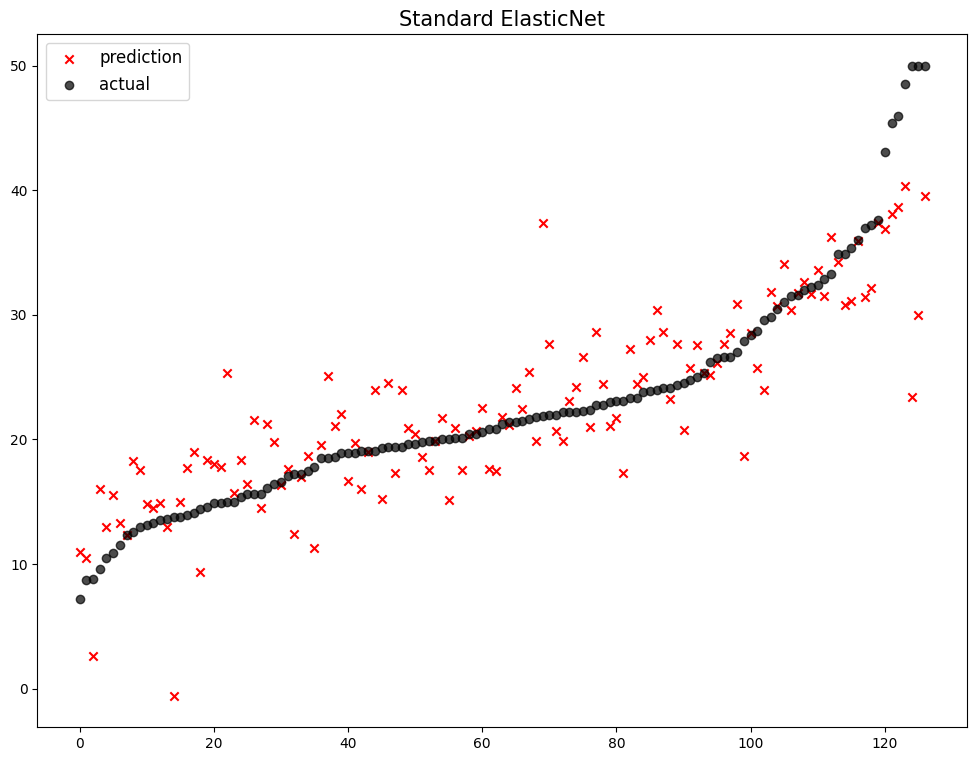

                       model        mse
0           Lasso(alpha=100)  65.923547
1            Lasso(alpha=10)  39.180052
2             Lasso(alpha=1)  27.198976
3           Lasso(alpha=0.1)  27.128990
4   ElasticNet(l1_ratio=0.8)  26.316621
5            Ridge(alpha=10)  26.218671
6   ElasticNet(l1_ratio=0.5)  26.151010
7   ElasticNet(l1_ratio=0.2)  26.027322
8           Ridge(alpha=100)  25.740489
9             Ridge(alpha=1)  25.451526
10       Standard ElasticNet  25.337552
11         Lasso(alpha=0.01)  25.145844
12          Ridge(alpha=0.1)  24.863174
13        Lasso(alpha=0.001)  24.802160
14         Ridge(alpha=0.01)  24.778254
15       Lasso(alpha=0.0001)  24.771853
16        Ridge(alpha=0.001)  24.769506
17       Ridge(alpha=0.0001)  24.768628
18          LinearRegression  24.768531


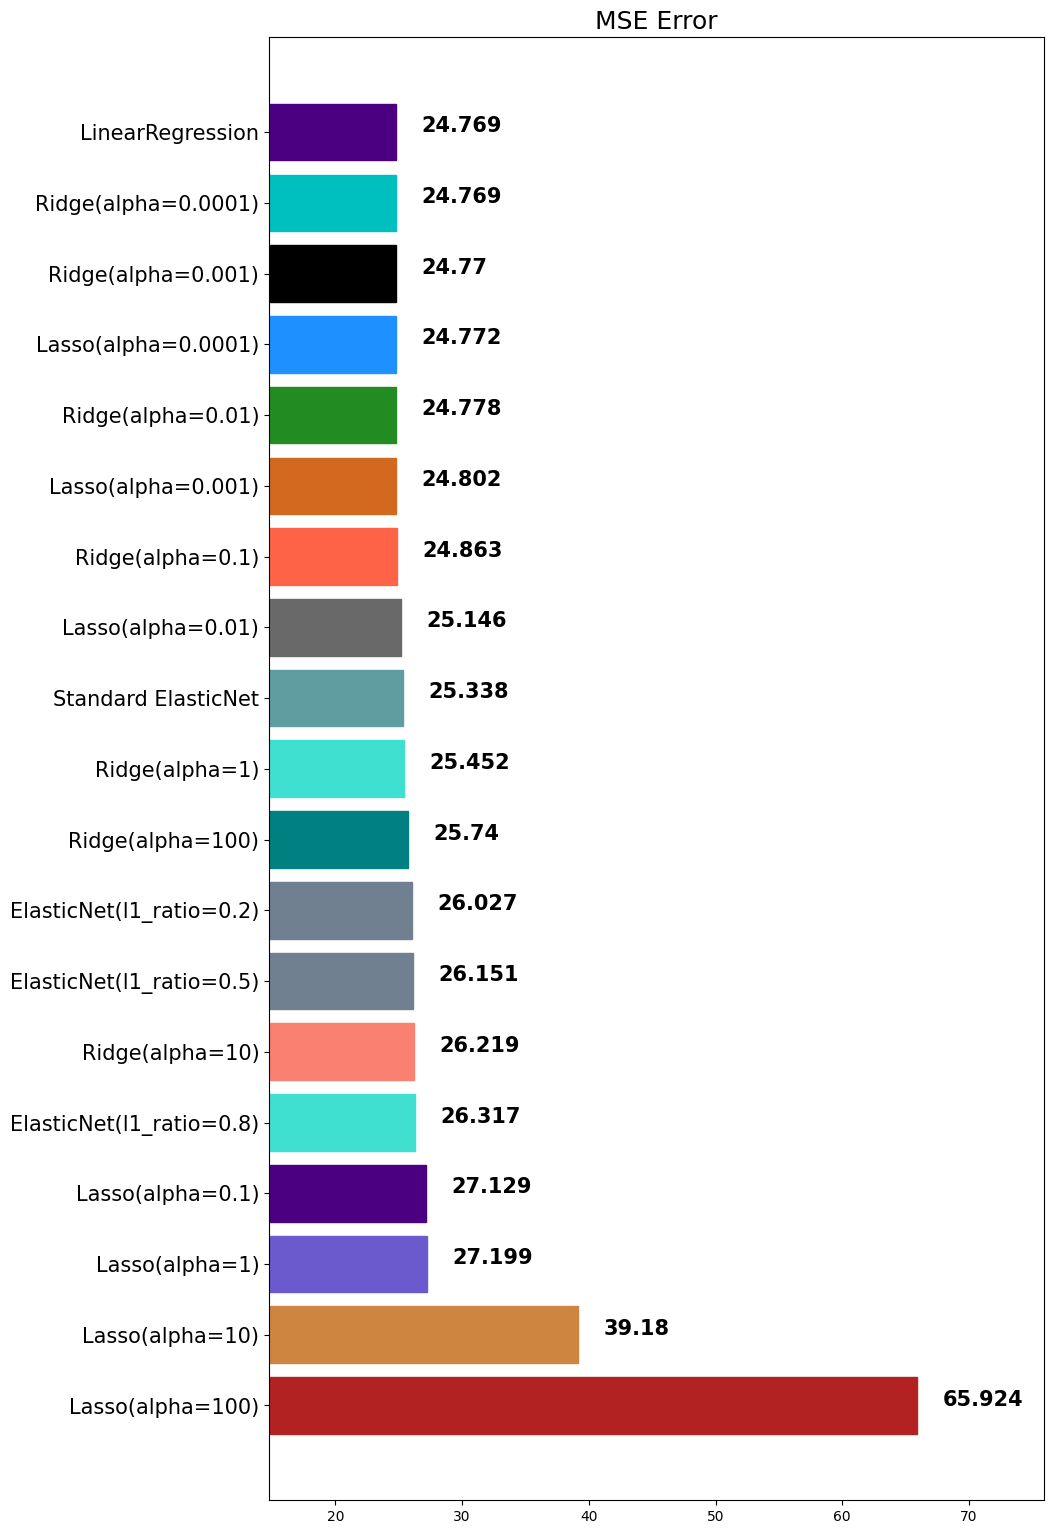

In [ ]:
mse_eval('Standard ElasticNet', elasticnet_pred, y_test)

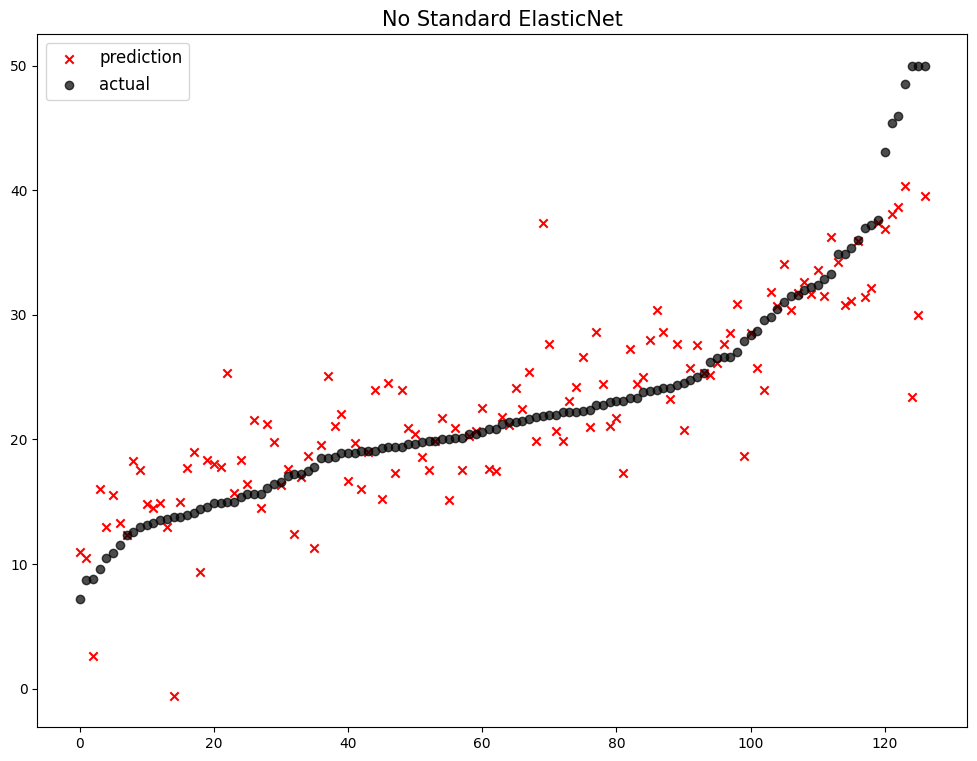

                       model        mse
0           Lasso(alpha=100)  65.923547
1            Lasso(alpha=10)  39.180052
2             Lasso(alpha=1)  27.198976
3           Lasso(alpha=0.1)  27.128990
4   ElasticNet(l1_ratio=0.8)  26.316621
5            Ridge(alpha=10)  26.218671
6   ElasticNet(l1_ratio=0.5)  26.151010
7   ElasticNet(l1_ratio=0.2)  26.027322
8           Ridge(alpha=100)  25.740489
9             Ridge(alpha=1)  25.451526
10       Standard ElasticNet  25.337552
11    No Standard ElasticNet  25.337552
12         Lasso(alpha=0.01)  25.145844
13          Ridge(alpha=0.1)  24.863174
14        Lasso(alpha=0.001)  24.802160
15         Ridge(alpha=0.01)  24.778254
16       Lasso(alpha=0.0001)  24.771853
17        Ridge(alpha=0.001)  24.769506
18       Ridge(alpha=0.0001)  24.768628
19          LinearRegression  24.768531


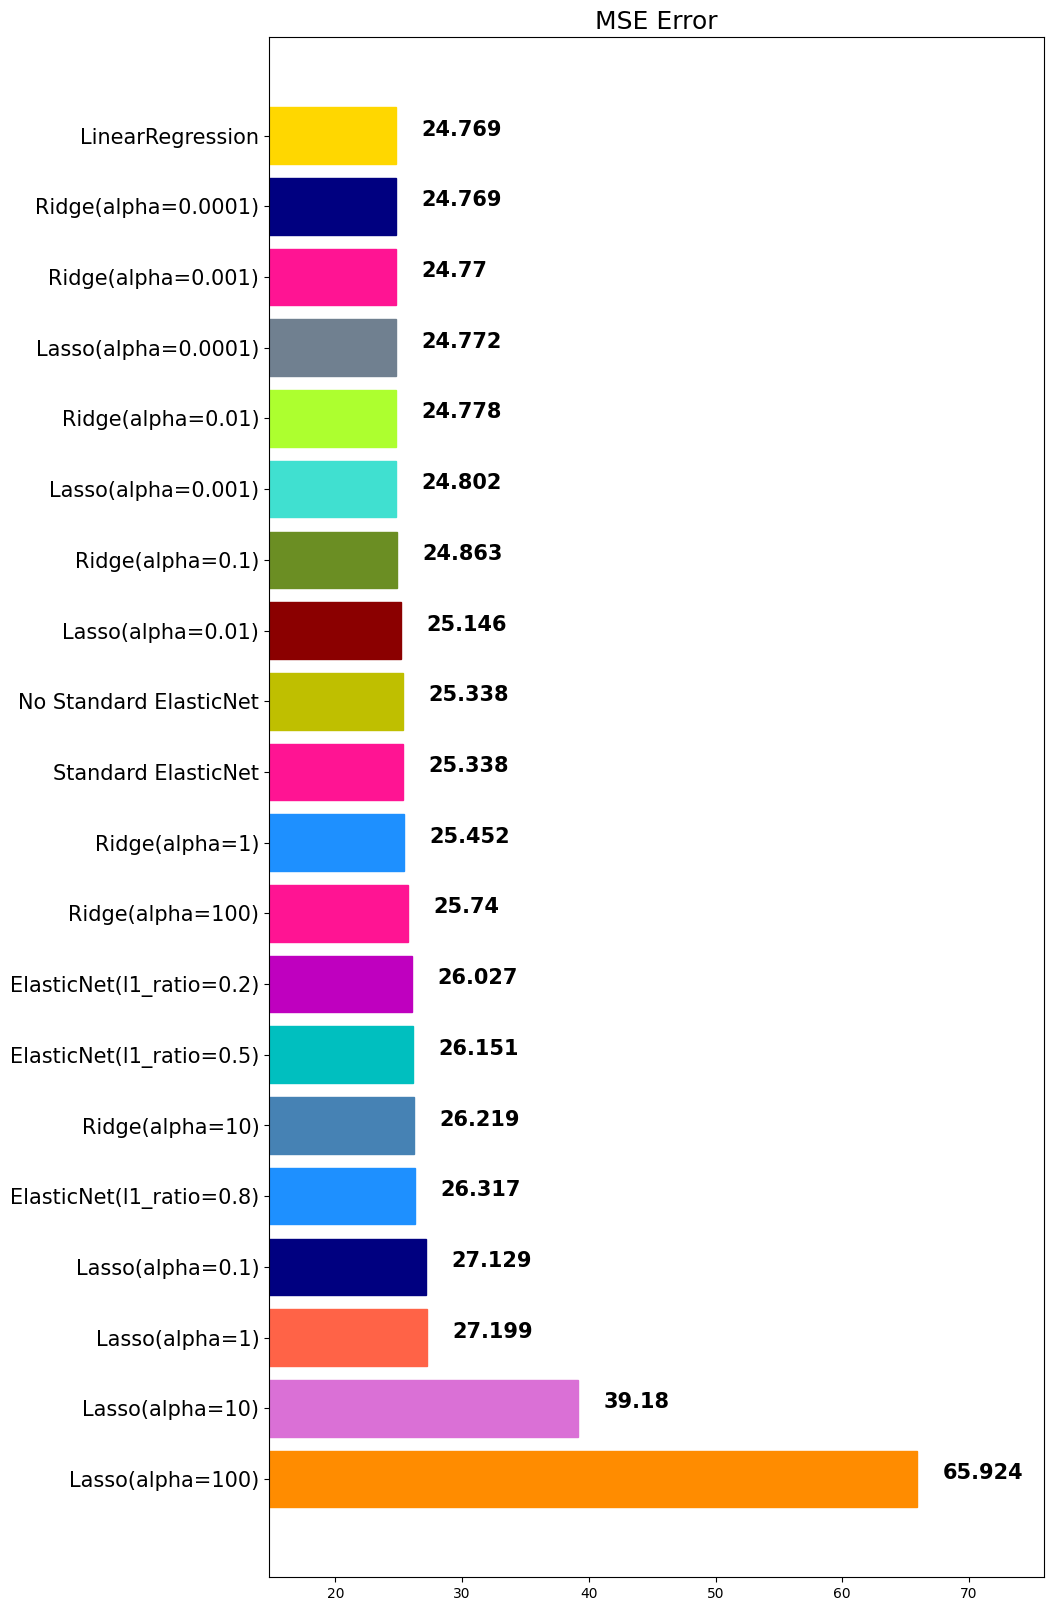

In [ ]:
elasticnet_no_pipeline = ElasticNet(alpha=0.1, l1_ratio=0.2)
no_pipeline_pred = elasticnet_no_pipeline.fit(x_train, y_train).predict(x_test)
mse_eval('No Standard ElasticNet', elasticnet_pred, y_test)

### 다항 회귀
* 주어진 데이터가 단순한 직선보다 복잡한 형태라면 어떻게 할 것인가?
* 비선형 데이터를 학습하는데 선형 모델을 사용할 수 있다.
* 이렇게 하는 간단한 방법은 각 특성의 거듭제곱을 새로운 특성으로 추가하고,   
  이 확장된 특성을 포함한 데이터셋에 선형 모델을 훈련시키는 것이다.  
  이런 기법을 다항 회귀(polynominal regression)라고 한다.

**다항 회귀를 활용한 2차 방정식 풀이**

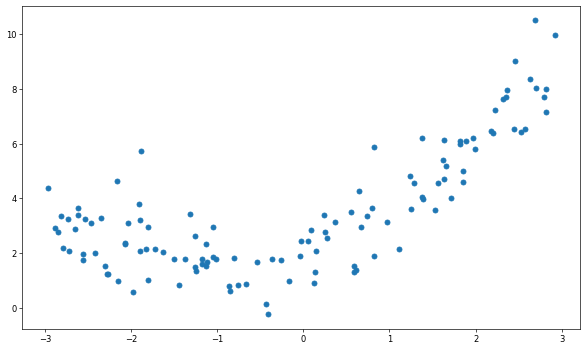

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

m = 120
np.random.seed(42)

# -3 ~ 3 범위의 실수값을 생성
# rand함수는 0~1사이의 실수값을 생성한다.
X = 6 * np.random.rand(m,1) - 3
y = 0.5*X**2 + X + 2 + np.random.randn(m,1)
plt.figure(figsize=(12,7), dpi=60)
plt.scatter(X, y)

In [ ]:
# 위의 데이터를 PolynominalFeatures를 사용해 훈련 데이터를 변환해보자.
# PolynomialFeatures의 degree 값이 다항의 차수를 정의한다.
# degree=2이면 2차, 3이면 3차이다.
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [ ]:
# X_poly는 제곱의 특성값(Feature)을 추가로 갖는다.
# X, X**2
X_poly[0]

array([-0.75275929,  0.56664654, -0.42654845])

특성이 여러 개일 때 다항 회귀는 이 특성 사이의 관계를 찾을 수 있다.  
PolynominalFeatures가 주어진 차수까지 특성 간의 모든 교차항을 추가하기 때문이다.
예를 들면, 두 개의 특성 a,b가 있을 때 degree=3으로 PolynominalFeatures를 적용 하면 $$a^2, a^3, b^2, b^3 $$ 뿐만 아니라, $$ab,a^2b,ab^2$$ 도 특성으로 추가한다.

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.07417096]), array([[0.89094457, 0.49503308, 0.01293085]]))

In [ ]:
import os

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

그림 저장: quadratic_predictions_plot


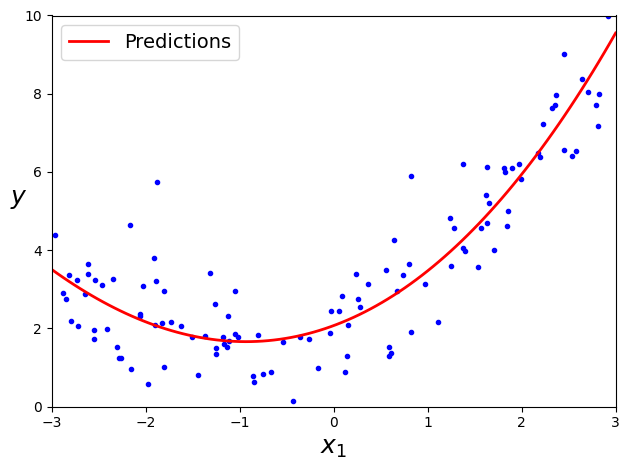

In [ ]:
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_predictions_plot")
plt.show()

In [ ]:
# 고차 다항 회귀를 적용하면 보통의 선형 회귀에서보다 훨씬 더 훈련 데이터에 잘 맞추려 할 것이다.
# 300차 다항 회귀 모델과 선형 모델, 그리고 2차 모델과 비교해 보자

위의 그래프를 보면 고차 다항 회귀 모델은 심각하게 훈련 데이터에 과대적합(Overfitting) 되었다.    
반면에 선형 모델은 과소적합(Underfitting)되었다.  위의 그림에서 가장 일반화가  
잘된 모델은 2차 다항 회귀이다. 2차방정식으로 생성한 데이터이기 때문에 당연한   
결과지만 일반적으로 어떤 데이터가 생성됐는지 알 수 없다.   
훈련 데이터에서는 성능이 좋지만 검증 점수가 나쁘다면 모델이 과대적합된 것이고,  
양쪽 모두 좋지 않으면 과소적합이다.


그림 저장: high_degree_polynomials_plot


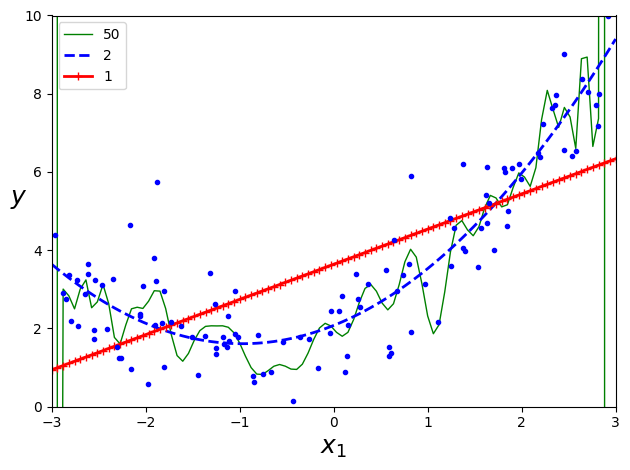

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 50), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("high_degree_polynomials_plot")
plt.show()

### Polynomial Features

[도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html?highlight=poly%20feature#sklearn.preprocessing.PolynomialFeatures)

다항식의 계수간 상호작용을 통해 **새로운 feature를 생성**합니다.

예를들면, [a, b] 2개의 feature가 존재한다고 가정하고,

degree=2로 설정한다면, polynomial features 는 [1, a, b, a^2, ab, b^2] 가 됩니다.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=False)

In [ ]:
poly_features = poly.fit_transform(x_train)[0]

In [ ]:
poly_features

array([    34.5       ,    396.9       ,      6.037     ,      0.03961   ,
            5.9853    ,      5.19      ,      8.01      ,      0.515     ,
           20.2       ,      5.        ,      0.        ,    224.        ,
            0.        ,   1190.25      ,  13693.05      ,    208.2765    ,
            1.366545  ,    206.49285   ,    179.055     ,    276.345     ,
           17.7675    ,    696.9       ,    172.5       ,      0.        ,
         7728.        ,      0.        , 157529.61      ,   2396.0853    ,
           15.721209  ,   2375.56557   ,   2059.911     ,   3179.169     ,
          204.4035    ,   8017.38      ,   1984.5       ,      0.        ,
        88905.6       ,      0.        ,     36.445369  ,      0.23912557,
           36.1332561 ,     31.33203   ,     48.35637   ,      3.109055  ,
          121.9474    ,     30.185     ,      0.        ,   1352.288     ,
            0.        ,      0.00156895,      0.23707773,      0.2055759 ,
            0.3172761 ,  

In [ ]:
x_train.iloc[0]

,335
AGE,34.50000
B,396.90000
RM,6.03700
CRIM,0.03961
DIS,5.98530
INDUS,5.19000
LSTAT,8.01000
NOX,0.51500
PTRATIO,20.20000
RAD,5.00000


In [ ]:
poly_pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    StandardScaler(),
    ElasticNet(alpha=0.1, l1_ratio=0.2)
)

In [ ]:
poly_pred = poly_pipeline.fit(x_train, y_train).predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.056e+01, tolerance: 3.268e+00
  model = cd_fast.enet_coordinate_descent(


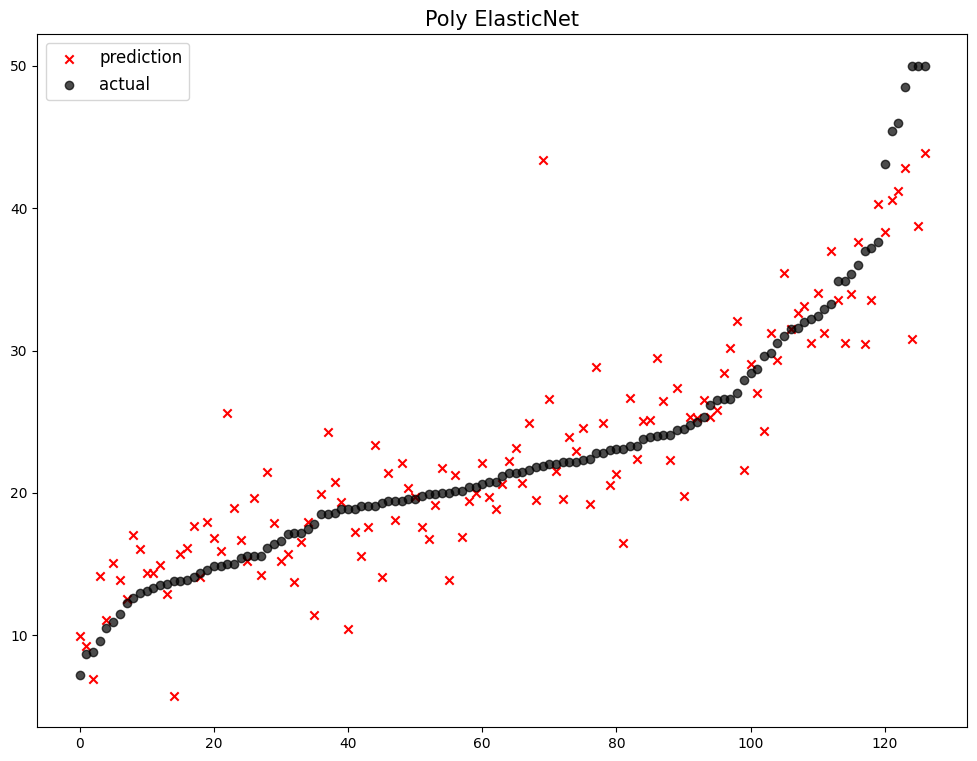

                       model        mse
0           Lasso(alpha=100)  65.923547
1            Lasso(alpha=10)  39.180052
2             Lasso(alpha=1)  27.198976
3           Lasso(alpha=0.1)  27.128990
4   ElasticNet(l1_ratio=0.8)  26.316621
5            Ridge(alpha=10)  26.218671
6   ElasticNet(l1_ratio=0.5)  26.151010
7   ElasticNet(l1_ratio=0.2)  26.027322
8           Ridge(alpha=100)  25.740489
9             Ridge(alpha=1)  25.451526
10       Standard ElasticNet  25.337552
11    No Standard ElasticNet  25.337552
12         Lasso(alpha=0.01)  25.145844
13          Ridge(alpha=0.1)  24.863174
14        Lasso(alpha=0.001)  24.802160
15         Ridge(alpha=0.01)  24.778254
16       Lasso(alpha=0.0001)  24.771853
17        Ridge(alpha=0.001)  24.769506
18       Ridge(alpha=0.0001)  24.768628
19          LinearRegression  24.768531
20           Poly ElasticNet  18.006820


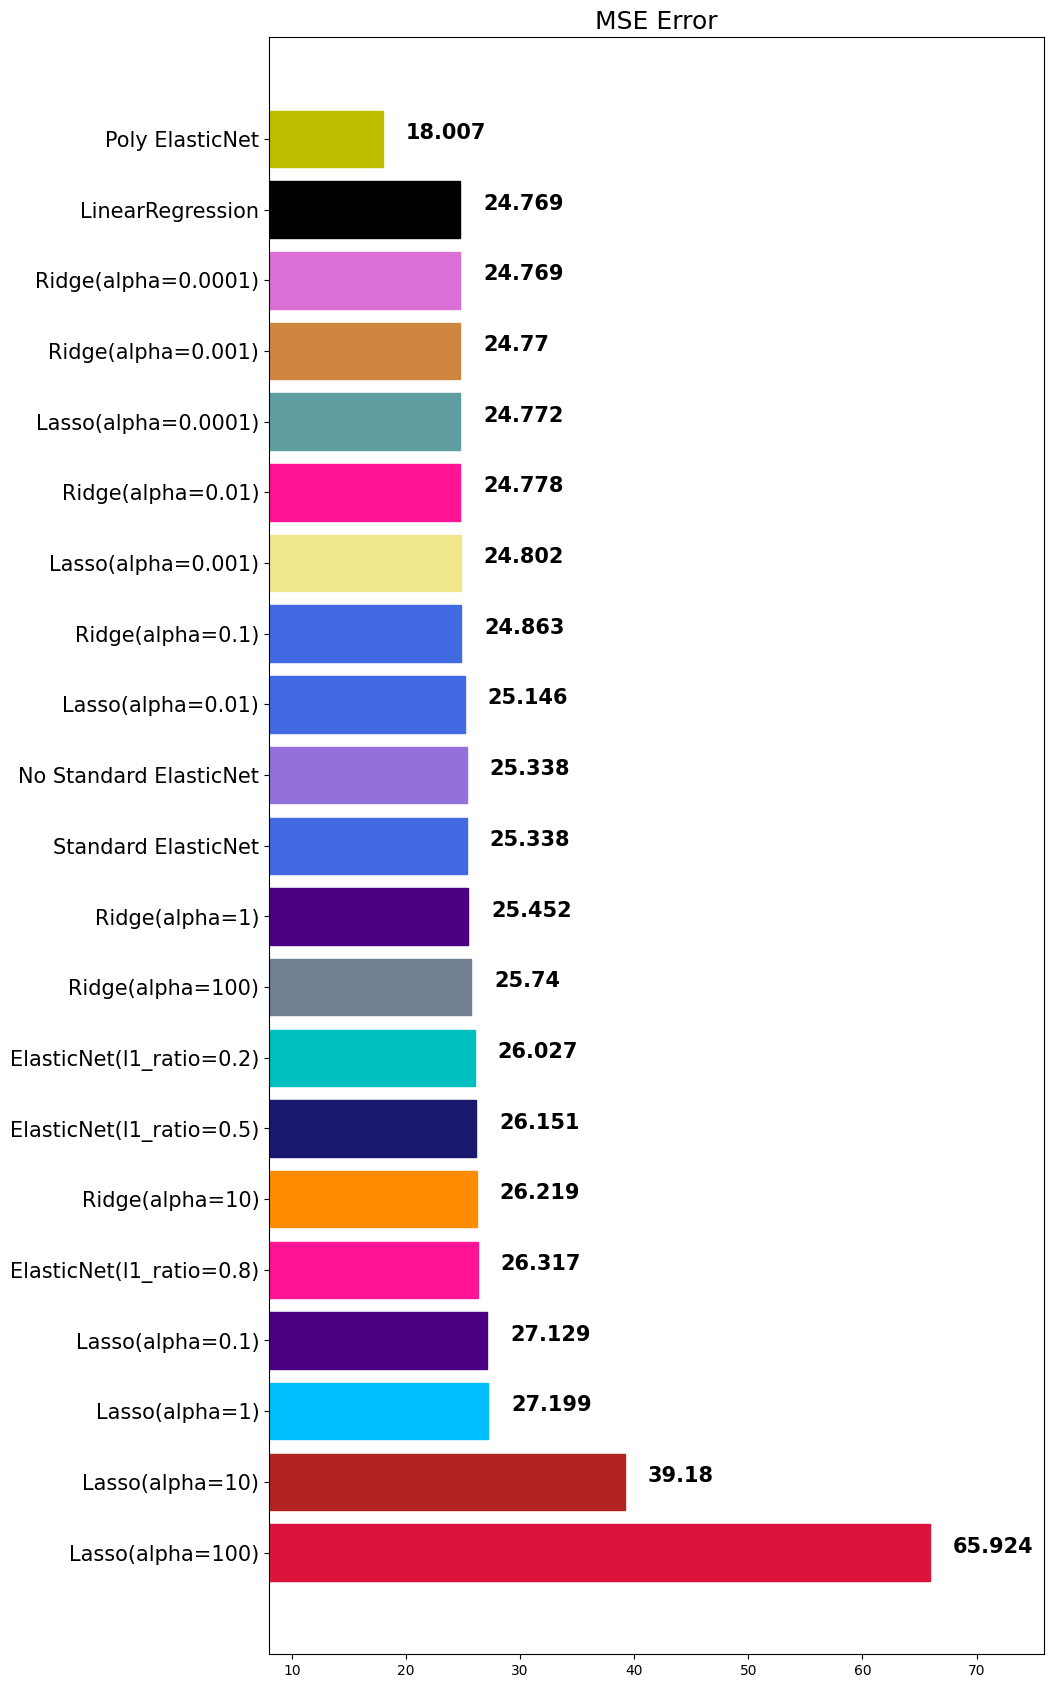

In [ ]:
mse_eval('Poly ElasticNet', poly_pred, y_test)